In [170]:
import pandas as pd
import numpy as np


df = pd.read_csv('out.csv')
df_train = df.truncate(after = 999)
# df_train
# df_train.head()
X_train = df_train.to_numpy()[:-50]
X_test = df_train.to_numpy()[-50:]
print(len(df_train.to_numpy()))
print(len(X_train))
print(len(X_test))

X_test[0]

1000
950
50


array([ 1,  1,  0,  1,  0,  0,  9,  3,  0,  9, -1,  9, -3,  9, -3])

In [171]:


# Data-Labeling Procedure
def period_score(a):
    if a == 0 or a == 1: return a
    if a == 2 or a == 3: return 2
    if a == 4 or a == 5: return 3
    if a > 5: return 4

def sleep_score(a):
    if a < 7: return -1
    if a == 7: return 1
    if a == 8: return 2
    if a == 9: return 1
    if a > 9: return -1

def delay_score(a):
    if a > 2: return -2
    if a == 2: return -1
    if a == 1 or a == 0 or a == -1 : return 0
    if a == -2: return -1
    if a < -2: return -2
    
sc_weight = 2
ev_weight = 1
sl_weight = 3
social_r = -0.05
edu_r = 0.22
game_r = -0.2
max_score = 4*edu_r *(sc_weight + ev_weight + sl_weight) + 6
min_score =  (4*social_r  + 4*game_r)*(sc_weight + ev_weight + sl_weight) -9

df_label = pd.DataFrame(columns = ["Sc_Social","Ev_Social","Sl_Social","Sc_Edu","Ev_Edu","Sl_Edu","Sc_Game","Ev_Game","Sl_Game","Day1_Hs","Day1_D","Day2_Hs","Day2_D","Day3_Hs","Day3_D", "Score"]
                     ,index=[0])

for idx, row in df_train.iterrows():
#     print(row['Sc_Game'])
#     print(period_score(row['Sc_Game']))
    score = []
    score.append(period_score(row['Sc_Social'])*sc_weight*social_r)
    score.append(period_score(row['Ev_Social'])*ev_weight*social_r)
    score.append(period_score(row['Sl_Social'])*sl_weight*social_r)
    score.append(period_score(row['Sc_Edu'])*sc_weight*edu_r)
    score.append(period_score(row['Ev_Edu'])*ev_weight*edu_r)
    score.append(period_score(row['Sl_Edu'])*sl_weight*edu_r)
    score.append(period_score(row['Sc_Game'])*sc_weight*game_r)
    score.append(period_score(row['Ev_Game'])*ev_weight*game_r)
    score.append(period_score(row['Sl_Game'])*sl_weight*game_r)
    score.append(sleep_score(row['Day1_Hs']))
    score.append(delay_score(row['Day1_D']))
    score.append(sleep_score(row['Day2_Hs']))
    score.append(delay_score(row['Day2_D']))
    score.append(sleep_score(row['Day3_Hs']))
    score.append(delay_score(row['Day3_D']))
    wellbeing_score = ((sum(score) - min_score)*10)/(max_score - min_score)
    score.append(wellbeing_score)
    df_label.loc[df_label.index.max()+1] = score

df_label = df_label.drop([0])
# Y = df_label['Score'].to_numpy()

Y_train = df_label['Score'].to_numpy()[:-50]
Y_test = df_label['Score'].to_numpy()[-50:]
print(len(df_label['Score'].to_numpy()))
print(len(Y_train))
print(len(Y_test))
Y_test

1000
950
50


array([4.67656012, 4.34550989, 4.95053272, 4.41780822, 4.95053272,
       4.73363775, 5.0304414 , 5.40715373, 6.68949772, 6.03881279,
       6.01598174, 6.39269406, 5.42998478, 5.66210046, 5.29680365,
       6.95205479, 7.54185693, 5.54794521, 5.32724505, 5.1826484 ,
       4.79452055, 5.67351598, 5.19025875, 5.4109589 , 6.01217656,
       5.23211568, 4.44063927, 4.7564688 , 4.6803653 , 4.77549467,
       4.43302892, 4.62328767, 4.5738204 , 5.55936073, 5.40715373,
       6.25951294, 7.32115677, 5.1369863 , 5.55936073, 4.73363775,
       6.00456621, 5.70395738, 5.78386606, 6.05783866, 4.83637747,
       4.06012177, 3.48173516, 3.45509893, 2.3630137 , 3.78614916])

Train on 760 samples, validate on 190 samples
Epoch 1/1000
760/760 [==============================] - 1s 924us/sample - loss: 298.6045 - root_mean_squared_error: 17.2802 - val_loss: 252.4465 - val_root_mean_squared_error: 15.8886
Epoch 2/1000
760/760 [==============================] - 0s 81us/sample - loss: 138.0125 - root_mean_squared_error: 11.7479 - val_loss: 169.5242 - val_root_mean_squared_error: 13.0201
Epoch 3/1000
760/760 [==============================] - 0s 74us/sample - loss: 84.9393 - root_mean_squared_error: 9.2162 - val_loss: 105.0494 - val_root_mean_squared_error: 10.2494
Epoch 4/1000
760/760 [==============================] - 0s 71us/sample - loss: 54.0411 - root_mean_squared_error: 7.3513 - val_loss: 69.3406 - val_root_mean_squared_error: 8.3271
Epoch 5/1000
760/760 [==============================] - 0s 74us/sample - loss: 36.8442 - root_mean_squared_error: 6.0699 - val_loss: 48.7344 - val_root_mean_squared_error: 6.9810
Epoch 6/1000
760/760 [==========================

Epoch 47/1000
760/760 [==============================] - 0s 74us/sample - loss: 1.0177 - root_mean_squared_error: 1.0088 - val_loss: 2.3061 - val_root_mean_squared_error: 1.5186
Epoch 48/1000
760/760 [==============================] - 0s 77us/sample - loss: 0.9981 - root_mean_squared_error: 0.9991 - val_loss: 2.3888 - val_root_mean_squared_error: 1.5456
Epoch 49/1000
760/760 [==============================] - 0s 81us/sample - loss: 0.9811 - root_mean_squared_error: 0.9905 - val_loss: 2.2970 - val_root_mean_squared_error: 1.5156
Epoch 50/1000
760/760 [==============================] - 0s 74us/sample - loss: 0.9477 - root_mean_squared_error: 0.9735 - val_loss: 2.3343 - val_root_mean_squared_error: 1.5279
Epoch 51/1000
760/760 [==============================] - 0s 74us/sample - loss: 0.9392 - root_mean_squared_error: 0.9691 - val_loss: 2.5906 - val_root_mean_squared_error: 1.6095
Epoch 52/1000
760/760 [==============================] - 0s 79us/sample - loss: 0.9706 - root_mean_squared_err

760/760 [==============================] - 0s 72us/sample - loss: 0.5358 - root_mean_squared_error: 0.7320 - val_loss: 1.0763 - val_root_mean_squared_error: 1.0375
Epoch 94/1000
760/760 [==============================] - 0s 74us/sample - loss: 0.5567 - root_mean_squared_error: 0.7461 - val_loss: 1.1760 - val_root_mean_squared_error: 1.0844
Epoch 95/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.5603 - root_mean_squared_error: 0.7485 - val_loss: 0.9495 - val_root_mean_squared_error: 0.9744
Epoch 96/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.5481 - root_mean_squared_error: 0.7404 - val_loss: 0.9746 - val_root_mean_squared_error: 0.9872
Epoch 97/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.5223 - root_mean_squared_error: 0.7227 - val_loss: 1.1288 - val_root_mean_squared_error: 1.0624
Epoch 98/1000
760/760 [==============================] - 0s 74us/sample - loss: 0.5089 - root_mean_squared_error: 0.7134 - v

Epoch 139/1000
760/760 [==============================] - 0s 78us/sample - loss: 0.4022 - root_mean_squared_error: 0.6342 - val_loss: 0.6674 - val_root_mean_squared_error: 0.8169
Epoch 140/1000
760/760 [==============================] - 0s 80us/sample - loss: 0.3554 - root_mean_squared_error: 0.5962 - val_loss: 0.6478 - val_root_mean_squared_error: 0.8048
Epoch 141/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.3690 - root_mean_squared_error: 0.6074 - val_loss: 0.5642 - val_root_mean_squared_error: 0.7511
Epoch 142/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.3733 - root_mean_squared_error: 0.6110 - val_loss: 0.5848 - val_root_mean_squared_error: 0.7647
Epoch 143/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.3650 - root_mean_squared_error: 0.6041 - val_loss: 0.5764 - val_root_mean_squared_error: 0.7592
Epoch 144/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.3723 - root_mean_squar

Epoch 185/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.3578 - root_mean_squared_error: 0.5982 - val_loss: 0.4904 - val_root_mean_squared_error: 0.7003
Epoch 186/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.2898 - root_mean_squared_error: 0.5383 - val_loss: 0.5018 - val_root_mean_squared_error: 0.7084
Epoch 187/1000
760/760 [==============================] - 0s 70us/sample - loss: 0.3250 - root_mean_squared_error: 0.5701 - val_loss: 0.4373 - val_root_mean_squared_error: 0.6613
Epoch 188/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.3289 - root_mean_squared_error: 0.5735 - val_loss: 0.7481 - val_root_mean_squared_error: 0.8649
Epoch 189/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.3248 - root_mean_squared_error: 0.5699 - val_loss: 0.4129 - val_root_mean_squared_error: 0.6426
Epoch 190/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.3271 - root_mean_squar

Epoch 231/1000
760/760 [==============================] - 0s 70us/sample - loss: 0.2639 - root_mean_squared_error: 0.5137 - val_loss: 0.3608 - val_root_mean_squared_error: 0.6006
Epoch 232/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.3014 - root_mean_squared_error: 0.5490 - val_loss: 0.3615 - val_root_mean_squared_error: 0.6012
Epoch 233/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.2972 - root_mean_squared_error: 0.5451 - val_loss: 0.3968 - val_root_mean_squared_error: 0.6299
Epoch 234/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.2756 - root_mean_squared_error: 0.5250 - val_loss: 0.4009 - val_root_mean_squared_error: 0.6332
Epoch 235/1000
760/760 [==============================] - 0s 70us/sample - loss: 0.2764 - root_mean_squared_error: 0.5257 - val_loss: 0.4053 - val_root_mean_squared_error: 0.6366
Epoch 236/1000
760/760 [==============================] - 0s 69us/sample - loss: 0.2969 - root_mean_squar

Epoch 277/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.2660 - root_mean_squared_error: 0.5158 - val_loss: 0.3388 - val_root_mean_squared_error: 0.5821
Epoch 278/1000
760/760 [==============================] - 0s 78us/sample - loss: 0.2502 - root_mean_squared_error: 0.5002 - val_loss: 0.4192 - val_root_mean_squared_error: 0.6474
Epoch 279/1000
760/760 [==============================] - 0s 74us/sample - loss: 0.2483 - root_mean_squared_error: 0.4983 - val_loss: 0.3816 - val_root_mean_squared_error: 0.6177
Epoch 280/1000
760/760 [==============================] - 0s 77us/sample - loss: 0.2336 - root_mean_squared_error: 0.4833 - val_loss: 0.3593 - val_root_mean_squared_error: 0.5994
Epoch 281/1000
760/760 [==============================] - 0s 76us/sample - loss: 0.2647 - root_mean_squared_error: 0.5145 - val_loss: 0.3370 - val_root_mean_squared_error: 0.5805
Epoch 282/1000
760/760 [==============================] - 0s 79us/sample - loss: 0.2549 - root_mean_squar

Epoch 323/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.2402 - root_mean_squared_error: 0.4901 - val_loss: 0.3235 - val_root_mean_squared_error: 0.5687
Epoch 324/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.2510 - root_mean_squared_error: 0.5010 - val_loss: 0.4070 - val_root_mean_squared_error: 0.6379
Epoch 325/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.2344 - root_mean_squared_error: 0.4841 - val_loss: 0.3718 - val_root_mean_squared_error: 0.6097
Epoch 326/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.2348 - root_mean_squared_error: 0.4845 - val_loss: 0.3501 - val_root_mean_squared_error: 0.5917
Epoch 327/1000
760/760 [==============================] - 0s 74us/sample - loss: 0.2145 - root_mean_squared_error: 0.4632 - val_loss: 0.3582 - val_root_mean_squared_error: 0.5985
Epoch 328/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.2184 - root_mean_squar

Epoch 369/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.2154 - root_mean_squared_error: 0.4641 - val_loss: 0.3221 - val_root_mean_squared_error: 0.5675
Epoch 370/1000
760/760 [==============================] - 0s 76us/sample - loss: 0.2092 - root_mean_squared_error: 0.4573 - val_loss: 0.3722 - val_root_mean_squared_error: 0.6101
Epoch 371/1000
760/760 [==============================] - 0s 74us/sample - loss: 0.3007 - root_mean_squared_error: 0.5483 - val_loss: 0.3264 - val_root_mean_squared_error: 0.5713
Epoch 372/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.2161 - root_mean_squared_error: 0.4649 - val_loss: 0.3463 - val_root_mean_squared_error: 0.5885
Epoch 373/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.2061 - root_mean_squared_error: 0.4540 - val_loss: 0.3873 - val_root_mean_squared_error: 0.6223
Epoch 374/1000
760/760 [==============================] - 0s 74us/sample - loss: 0.2057 - root_mean_squar

Epoch 415/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.2094 - root_mean_squared_error: 0.4577 - val_loss: 0.3473 - val_root_mean_squared_error: 0.5894
Epoch 416/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.2119 - root_mean_squared_error: 0.4604 - val_loss: 0.4082 - val_root_mean_squared_error: 0.6389
Epoch 417/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.2255 - root_mean_squared_error: 0.4749 - val_loss: 0.3621 - val_root_mean_squared_error: 0.6018
Epoch 418/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.2209 - root_mean_squared_error: 0.4700 - val_loss: 0.3737 - val_root_mean_squared_error: 0.6113
Epoch 419/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.2299 - root_mean_squared_error: 0.4794 - val_loss: 0.4239 - val_root_mean_squared_error: 0.6510
Epoch 420/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.2212 - root_mean_squar

Epoch 461/1000
760/760 [==============================] - 0s 70us/sample - loss: 0.2080 - root_mean_squared_error: 0.4561 - val_loss: 0.3758 - val_root_mean_squared_error: 0.6130
Epoch 462/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.2011 - root_mean_squared_error: 0.4484 - val_loss: 0.3272 - val_root_mean_squared_error: 0.5720
Epoch 463/1000
760/760 [==============================] - 0s 70us/sample - loss: 0.2145 - root_mean_squared_error: 0.4632 - val_loss: 0.3829 - val_root_mean_squared_error: 0.6188
Epoch 464/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1857 - root_mean_squared_error: 0.4310 - val_loss: 0.3685 - val_root_mean_squared_error: 0.6071
Epoch 465/1000
760/760 [==============================] - 0s 70us/sample - loss: 0.2124 - root_mean_squared_error: 0.4609 - val_loss: 0.4202 - val_root_mean_squared_error: 0.6482
Epoch 466/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.2216 - root_mean_squar

Epoch 507/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.2140 - root_mean_squared_error: 0.4626 - val_loss: 0.4235 - val_root_mean_squared_error: 0.6508
Epoch 508/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1960 - root_mean_squared_error: 0.4428 - val_loss: 0.3925 - val_root_mean_squared_error: 0.6265
Epoch 509/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.1917 - root_mean_squared_error: 0.4378 - val_loss: 0.4083 - val_root_mean_squared_error: 0.6390
Epoch 510/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.2098 - root_mean_squared_error: 0.4580 - val_loss: 0.3953 - val_root_mean_squared_error: 0.6287
Epoch 511/1000
760/760 [==============================] - 0s 70us/sample - loss: 0.1975 - root_mean_squared_error: 0.4444 - val_loss: 0.3650 - val_root_mean_squared_error: 0.6042
Epoch 512/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.2036 - root_mean_squar

Epoch 553/1000
760/760 [==============================] - 0s 74us/sample - loss: 0.1814 - root_mean_squared_error: 0.4259 - val_loss: 0.3925 - val_root_mean_squared_error: 0.6265
Epoch 554/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.1826 - root_mean_squared_error: 0.4273 - val_loss: 0.3858 - val_root_mean_squared_error: 0.6211
Epoch 555/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1972 - root_mean_squared_error: 0.4440 - val_loss: 0.3904 - val_root_mean_squared_error: 0.6248
Epoch 556/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1805 - root_mean_squared_error: 0.4248 - val_loss: 0.3693 - val_root_mean_squared_error: 0.6077
Epoch 557/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1797 - root_mean_squared_error: 0.4239 - val_loss: 0.4246 - val_root_mean_squared_error: 0.6516
Epoch 558/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1868 - root_mean_squar

Epoch 599/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.1910 - root_mean_squared_error: 0.4371 - val_loss: 0.3824 - val_root_mean_squared_error: 0.6184
Epoch 600/1000
760/760 [==============================] - 0s 77us/sample - loss: 0.1830 - root_mean_squared_error: 0.4278 - val_loss: 0.3901 - val_root_mean_squared_error: 0.6246
Epoch 601/1000
760/760 [==============================] - 0s 76us/sample - loss: 0.1841 - root_mean_squared_error: 0.4290 - val_loss: 0.3925 - val_root_mean_squared_error: 0.6265
Epoch 602/1000
760/760 [==============================] - 0s 79us/sample - loss: 0.1886 - root_mean_squared_error: 0.4342 - val_loss: 0.3469 - val_root_mean_squared_error: 0.5890
Epoch 603/1000
760/760 [==============================] - 0s 78us/sample - loss: 0.1857 - root_mean_squared_error: 0.4309 - val_loss: 0.3989 - val_root_mean_squared_error: 0.6316
Epoch 604/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.2021 - root_mean_squar

Epoch 645/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1968 - root_mean_squared_error: 0.4436 - val_loss: 0.4155 - val_root_mean_squared_error: 0.6446
Epoch 646/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1858 - root_mean_squared_error: 0.4310 - val_loss: 0.3653 - val_root_mean_squared_error: 0.6044
Epoch 647/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.1828 - root_mean_squared_error: 0.4275 - val_loss: 0.4264 - val_root_mean_squared_error: 0.6530
Epoch 648/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1704 - root_mean_squared_error: 0.4128 - val_loss: 0.3760 - val_root_mean_squared_error: 0.6132
Epoch 649/1000
760/760 [==============================] - 0s 70us/sample - loss: 0.1738 - root_mean_squared_error: 0.4168 - val_loss: 0.3718 - val_root_mean_squared_error: 0.6097
Epoch 650/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.1722 - root_mean_squar

Epoch 691/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.1812 - root_mean_squared_error: 0.4257 - val_loss: 0.3665 - val_root_mean_squared_error: 0.6054
Epoch 692/1000
760/760 [==============================] - 0s 74us/sample - loss: 0.1711 - root_mean_squared_error: 0.4136 - val_loss: 0.3866 - val_root_mean_squared_error: 0.6218
Epoch 693/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.1746 - root_mean_squared_error: 0.4179 - val_loss: 0.3802 - val_root_mean_squared_error: 0.6166
Epoch 694/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1761 - root_mean_squared_error: 0.4196 - val_loss: 0.3643 - val_root_mean_squared_error: 0.6036
Epoch 695/1000
760/760 [==============================] - 0s 74us/sample - loss: 0.1709 - root_mean_squared_error: 0.4134 - val_loss: 0.4113 - val_root_mean_squared_error: 0.6413
Epoch 696/1000
760/760 [==============================] - 0s 78us/sample - loss: 0.1797 - root_mean_squar

Epoch 737/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.1801 - root_mean_squared_error: 0.4244 - val_loss: 0.3968 - val_root_mean_squared_error: 0.6300
Epoch 738/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.1777 - root_mean_squared_error: 0.4216 - val_loss: 0.3875 - val_root_mean_squared_error: 0.6225
Epoch 739/1000
760/760 [==============================] - 0s 76us/sample - loss: 0.1845 - root_mean_squared_error: 0.4296 - val_loss: 0.3452 - val_root_mean_squared_error: 0.5876
Epoch 740/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.1782 - root_mean_squared_error: 0.4221 - val_loss: 0.3426 - val_root_mean_squared_error: 0.5853
Epoch 741/1000
760/760 [==============================] - 0s 81us/sample - loss: 0.1725 - root_mean_squared_error: 0.4153 - val_loss: 0.3640 - val_root_mean_squared_error: 0.6033
Epoch 742/1000
760/760 [==============================] - 0s 77us/sample - loss: 0.1648 - root_mean_squar

Epoch 783/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.1670 - root_mean_squared_error: 0.4086 - val_loss: 0.3677 - val_root_mean_squared_error: 0.6064
Epoch 784/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.1615 - root_mean_squared_error: 0.4019 - val_loss: 0.4319 - val_root_mean_squared_error: 0.6572
Epoch 785/1000
760/760 [==============================] - 0s 74us/sample - loss: 0.1742 - root_mean_squared_error: 0.4173 - val_loss: 0.3620 - val_root_mean_squared_error: 0.6016
Epoch 786/1000
760/760 [==============================] - 0s 74us/sample - loss: 0.1668 - root_mean_squared_error: 0.4084 - val_loss: 0.3468 - val_root_mean_squared_error: 0.5889
Epoch 787/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.1597 - root_mean_squared_error: 0.3997 - val_loss: 0.3512 - val_root_mean_squared_error: 0.5927
Epoch 788/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.1664 - root_mean_squar

Epoch 829/1000
760/760 [==============================] - 0s 78us/sample - loss: 0.1696 - root_mean_squared_error: 0.4119 - val_loss: 0.3646 - val_root_mean_squared_error: 0.6039
Epoch 830/1000
760/760 [==============================] - 0s 77us/sample - loss: 0.1678 - root_mean_squared_error: 0.4096 - val_loss: 0.3530 - val_root_mean_squared_error: 0.5941
Epoch 831/1000
760/760 [==============================] - 0s 76us/sample - loss: 0.1609 - root_mean_squared_error: 0.4011 - val_loss: 0.3622 - val_root_mean_squared_error: 0.6018
Epoch 832/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.1617 - root_mean_squared_error: 0.4021 - val_loss: 0.3747 - val_root_mean_squared_error: 0.6121
Epoch 833/1000
760/760 [==============================] - 0s 76us/sample - loss: 0.1671 - root_mean_squared_error: 0.4088 - val_loss: 0.3717 - val_root_mean_squared_error: 0.6097
Epoch 834/1000
760/760 [==============================] - 0s 75us/sample - loss: 0.1627 - root_mean_squar

Epoch 875/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1659 - root_mean_squared_error: 0.4073 - val_loss: 0.3930 - val_root_mean_squared_error: 0.6269
Epoch 876/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1622 - root_mean_squared_error: 0.4027 - val_loss: 0.3705 - val_root_mean_squared_error: 0.6087
Epoch 877/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1571 - root_mean_squared_error: 0.3964 - val_loss: 0.3538 - val_root_mean_squared_error: 0.5948
Epoch 878/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1633 - root_mean_squared_error: 0.4042 - val_loss: 0.3565 - val_root_mean_squared_error: 0.5971
Epoch 879/1000
760/760 [==============================] - 0s 69us/sample - loss: 0.1642 - root_mean_squared_error: 0.4052 - val_loss: 0.3615 - val_root_mean_squared_error: 0.6013
Epoch 880/1000
760/760 [==============================] - 0s 70us/sample - loss: 0.1638 - root_mean_squar

Epoch 921/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1631 - root_mean_squared_error: 0.4039 - val_loss: 0.3162 - val_root_mean_squared_error: 0.5623
Epoch 922/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.1558 - root_mean_squared_error: 0.3947 - val_loss: 0.3445 - val_root_mean_squared_error: 0.5869
Epoch 923/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1603 - root_mean_squared_error: 0.4004 - val_loss: 0.3462 - val_root_mean_squared_error: 0.5883
Epoch 924/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1654 - root_mean_squared_error: 0.4066 - val_loss: 0.3581 - val_root_mean_squared_error: 0.5984
Epoch 925/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.1660 - root_mean_squared_error: 0.4075 - val_loss: 0.3165 - val_root_mean_squared_error: 0.5626
Epoch 926/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1634 - root_mean_squar

Epoch 967/1000
760/760 [==============================] - 0s 74us/sample - loss: 0.1525 - root_mean_squared_error: 0.3906 - val_loss: 0.3080 - val_root_mean_squared_error: 0.5550
Epoch 968/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.1577 - root_mean_squared_error: 0.3971 - val_loss: 0.3146 - val_root_mean_squared_error: 0.5609
Epoch 969/1000
760/760 [==============================] - 0s 71us/sample - loss: 0.1561 - root_mean_squared_error: 0.3951 - val_loss: 0.3156 - val_root_mean_squared_error: 0.5618
Epoch 970/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.1537 - root_mean_squared_error: 0.3920 - val_loss: 0.3184 - val_root_mean_squared_error: 0.5642
Epoch 971/1000
760/760 [==============================] - 0s 72us/sample - loss: 0.1550 - root_mean_squared_error: 0.3937 - val_loss: 0.3498 - val_root_mean_squared_error: 0.5915
Epoch 972/1000
760/760 [==============================] - 0s 73us/sample - loss: 0.1606 - root_mean_squar

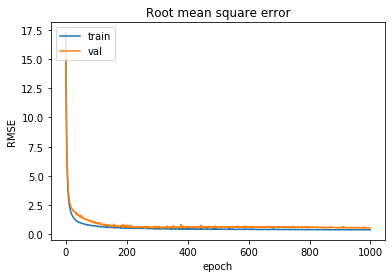

In [166]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt
%matplotlib inline


model = tf.keras.Sequential()
model.add(Dense(15, input_shape=(15,), activation = tf.math.square))

model.add(Dense(1))
model.compile(loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()], optimizer='adam')
# print(model.summary())

# optimizer = tf.keras.optimizers.RMSprop(0.0099)
# model.fit(X,Y,epochs=1000, batch_size=200)

history = model.fit(X_train, Y_train, validation_split= 0.2, epochs=1000, batch_size=20)
history_dict = history.history

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Root mean square error')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [167]:
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=10)
print("test loss, test acc:", results)

Evaluate on test data
50/50 [==============================] - 0s 116us/sample - loss: 0.2243 - root_mean_squared_error: 0.4736
test loss, test acc: [0.22428605034947396, 0.4735885]


In [140]:
i = 999
j = 0
while i < len(df.index):
    j += 1 
    _df_train = df.truncate(before = i+1, after = i+100)
    i += 100
    _X = _df_train.to_numpy()
    _Y = model.predict(X_test)
    X_train = np.concatenate((X, _X), axis=0)
    Y_train = np.append(Y,_Y)
    model.fit(X,Y, epochs=200, batch_size=20)
    if j%3 == 0:
        print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\
              @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\
              @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\
              @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\
              @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
        results = model.evaluate(X_test, Y_test, batch_size=10)
        print(results)

Epoch 1/200
100/100 [==============================] - 0s 89us/sample - loss: 0.2847 - root_mean_squared_error: 0.5336
Epoch 2/200
100/100 [==============================] - 0s 70us/sample - loss: 0.3116 - root_mean_squared_error: 0.5582
Epoch 3/200
100/100 [==============================] - 0s 70us/sample - loss: 0.3017 - root_mean_squared_error: 0.5493
Epoch 4/200
100/100 [==============================] - 0s 87us/sample - loss: 0.2440 - root_mean_squared_error: 0.4940
Epoch 5/200
100/100 [==============================] - 0s 67us/sample - loss: 0.2514 - root_mean_squared_error: 0.5014
Epoch 6/200
100/100 [==============================] - 0s 65us/sample - loss: 0.2510 - root_mean_squared_error: 0.5009
Epoch 7/200
100/100 [==============================] - 0s 66us/sample - loss: 0.2522 - root_mean_squared_error: 0.5022
Epoch 8/200
100/100 [==============================] - 0s 64us/sample - loss: 0.2366 - root_mean_squared_error: 0.4864
Epoch 9/200
100/100 [===========================

100/100 [==============================] - 0s 62us/sample - loss: 0.1289 - root_mean_squared_error: 0.3590
Epoch 70/200
100/100 [==============================] - 0s 60us/sample - loss: 0.1264 - root_mean_squared_error: 0.3555
Epoch 71/200
100/100 [==============================] - 0s 63us/sample - loss: 0.1304 - root_mean_squared_error: 0.3611
Epoch 72/200
100/100 [==============================] - 0s 63us/sample - loss: 0.1224 - root_mean_squared_error: 0.3499
Epoch 73/200
100/100 [==============================] - 0s 64us/sample - loss: 0.1307 - root_mean_squared_error: 0.3615
Epoch 74/200
100/100 [==============================] - 0s 62us/sample - loss: 0.1269 - root_mean_squared_error: 0.3562
Epoch 75/200
100/100 [==============================] - 0s 60us/sample - loss: 0.1199 - root_mean_squared_error: 0.3463
Epoch 76/200
100/100 [==============================] - 0s 59us/sample - loss: 0.1229 - root_mean_squared_error: 0.3506
Epoch 77/200
100/100 [==============================]

100/100 [==============================] - 0s 64us/sample - loss: 0.1014 - root_mean_squared_error: 0.3185
Epoch 138/200
100/100 [==============================] - 0s 65us/sample - loss: 0.1029 - root_mean_squared_error: 0.3207
Epoch 139/200
100/100 [==============================] - 0s 63us/sample - loss: 0.1030 - root_mean_squared_error: 0.3209
Epoch 140/200
100/100 [==============================] - 0s 63us/sample - loss: 0.1050 - root_mean_squared_error: 0.3241
Epoch 141/200
100/100 [==============================] - 0s 66us/sample - loss: 0.1069 - root_mean_squared_error: 0.3269
Epoch 142/200
100/100 [==============================] - 0s 63us/sample - loss: 0.1189 - root_mean_squared_error: 0.3449
Epoch 143/200
100/100 [==============================] - 0s 63us/sample - loss: 0.1155 - root_mean_squared_error: 0.3399
Epoch 144/200
100/100 [==============================] - 0s 63us/sample - loss: 0.1096 - root_mean_squared_error: 0.3311
Epoch 145/200
100/100 [=======================

100/100 [==============================] - 0s 62us/sample - loss: 0.0879 - root_mean_squared_error: 0.2965
Epoch 5/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0946 - root_mean_squared_error: 0.3076
Epoch 6/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0888 - root_mean_squared_error: 0.2980
Epoch 7/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0863 - root_mean_squared_error: 0.2938
Epoch 8/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0888 - root_mean_squared_error: 0.2979
Epoch 9/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0905 - root_mean_squared_error: 0.3008
Epoch 10/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0885 - root_mean_squared_error: 0.2975
Epoch 11/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0848 - root_mean_squared_error: 0.2913
Epoch 12/200
100/100 [==============================] - 0s

100/100 [==============================] - 0s 64us/sample - loss: 0.0810 - root_mean_squared_error: 0.2847
Epoch 73/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0844 - root_mean_squared_error: 0.2905
Epoch 74/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0840 - root_mean_squared_error: 0.2898
Epoch 75/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0869 - root_mean_squared_error: 0.2947
Epoch 76/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0892 - root_mean_squared_error: 0.2987
Epoch 77/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0880 - root_mean_squared_error: 0.2966
Epoch 78/200
100/100 [==============================] - 0s 62us/sample - loss: 0.1124 - root_mean_squared_error: 0.3353
Epoch 79/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0850 - root_mean_squared_error: 0.2915
Epoch 80/200
100/100 [==============================]

100/100 [==============================] - 0s 62us/sample - loss: 0.0759 - root_mean_squared_error: 0.2755
Epoch 141/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0731 - root_mean_squared_error: 0.2704
Epoch 142/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0688 - root_mean_squared_error: 0.2623
Epoch 143/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0719 - root_mean_squared_error: 0.2682
Epoch 144/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0715 - root_mean_squared_error: 0.2675
Epoch 145/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0724 - root_mean_squared_error: 0.2690
Epoch 146/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0679 - root_mean_squared_error: 0.2606
Epoch 147/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0679 - root_mean_squared_error: 0.2605
Epoch 148/200
100/100 [=======================

Epoch 8/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0682 - root_mean_squared_error: 0.2612
Epoch 9/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0650 - root_mean_squared_error: 0.2549
Epoch 10/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0780 - root_mean_squared_error: 0.2792
Epoch 11/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0828 - root_mean_squared_error: 0.2878
Epoch 12/200
100/100 [==============================] - 0s 62us/sample - loss: 0.1074 - root_mean_squared_error: 0.3277
Epoch 13/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0907 - root_mean_squared_error: 0.3011
Epoch 14/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0738 - root_mean_squared_error: 0.2717
Epoch 15/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0675 - root_mean_squared_error: 0.2598
Epoch 16/200
100/100 [====================

100/100 [==============================] - 0s 60us/sample - loss: 0.0580 - root_mean_squared_error: 0.2409
Epoch 77/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0567 - root_mean_squared_error: 0.2380
Epoch 78/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0710 - root_mean_squared_error: 0.2665
Epoch 79/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0674 - root_mean_squared_error: 0.2596
Epoch 80/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0620 - root_mean_squared_error: 0.2491
Epoch 81/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0828 - root_mean_squared_error: 0.2878
Epoch 82/200
100/100 [==============================] - ETA: 0s - loss: 0.0761 - root_mean_squared_error: 0.275 - 0s 66us/sample - loss: 0.0588 - root_mean_squared_error: 0.2426
Epoch 83/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0587 - root_mean_squared_error: 0.

100/100 [==============================] - 0s 61us/sample - loss: 0.0610 - root_mean_squared_error: 0.2469
Epoch 144/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0544 - root_mean_squared_error: 0.2333
Epoch 145/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0555 - root_mean_squared_error: 0.2355
Epoch 146/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0522 - root_mean_squared_error: 0.2284
Epoch 147/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0623 - root_mean_squared_error: 0.2496
Epoch 148/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0622 - root_mean_squared_error: 0.2495
Epoch 149/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0758 - root_mean_squared_error: 0.2754
Epoch 150/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0679 - root_mean_squared_error: 0.2606
Epoch 151/200
100/100 [=======================

100/100 [==============================] - 0s 62us/sample - loss: 0.0706 - root_mean_squared_error: 0.2657
Epoch 8/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0724 - root_mean_squared_error: 0.2690
Epoch 9/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0634 - root_mean_squared_error: 0.2517
Epoch 10/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0602 - root_mean_squared_error: 0.2453
Epoch 11/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0880 - root_mean_squared_error: 0.2966
Epoch 12/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0756 - root_mean_squared_error: 0.2750
Epoch 13/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0772 - root_mean_squared_error: 0.2778
Epoch 14/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0576 - root_mean_squared_error: 0.2400
Epoch 15/200
100/100 [==============================] -

100/100 [==============================] - 0s 62us/sample - loss: 0.0443 - root_mean_squared_error: 0.2105
Epoch 76/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0427 - root_mean_squared_error: 0.2065
Epoch 77/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0479 - root_mean_squared_error: 0.2189
Epoch 78/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0504 - root_mean_squared_error: 0.2245
Epoch 79/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0471 - root_mean_squared_error: 0.2170
Epoch 80/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0583 - root_mean_squared_error: 0.2414
Epoch 81/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0682 - root_mean_squared_error: 0.2612
Epoch 82/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0688 - root_mean_squared_error: 0.2623
Epoch 83/200
100/100 [==============================]

100/100 [==============================] - 0s 63us/sample - loss: 0.0442 - root_mean_squared_error: 0.2101
Epoch 144/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0446 - root_mean_squared_error: 0.2112
Epoch 145/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0428 - root_mean_squared_error: 0.2068
Epoch 146/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0461 - root_mean_squared_error: 0.2148
Epoch 147/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0540 - root_mean_squared_error: 0.2324
Epoch 148/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0574 - root_mean_squared_error: 0.2396
Epoch 149/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0456 - root_mean_squared_error: 0.2135
Epoch 150/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0458 - root_mean_squared_error: 0.2140
Epoch 151/200
100/100 [=======================

Epoch 11/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0518 - root_mean_squared_error: 0.2275
Epoch 12/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0534 - root_mean_squared_error: 0.2311
Epoch 13/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0530 - root_mean_squared_error: 0.2301
Epoch 14/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0471 - root_mean_squared_error: 0.2170
Epoch 15/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0446 - root_mean_squared_error: 0.2112
Epoch 16/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0409 - root_mean_squared_error: 0.2022
Epoch 17/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0385 - root_mean_squared_error: 0.1962
Epoch 18/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0419 - root_mean_squared_error: 0.2048
Epoch 19/200
100/100 [==================

100/100 [==============================] - 0s 61us/sample - loss: 0.0396 - root_mean_squared_error: 0.1989
Epoch 80/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0448 - root_mean_squared_error: 0.2116
Epoch 81/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0503 - root_mean_squared_error: 0.2243
Epoch 82/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0577 - root_mean_squared_error: 0.2402
Epoch 83/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0386 - root_mean_squared_error: 0.1965
Epoch 84/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0388 - root_mean_squared_error: 0.1970
Epoch 85/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0367 - root_mean_squared_error: 0.1916
Epoch 86/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0542 - root_mean_squared_error: 0.2329
Epoch 87/200
100/100 [==============================]

Epoch 147/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0571 - root_mean_squared_error: 0.2389
Epoch 148/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0447 - root_mean_squared_error: 0.2114
Epoch 149/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0401 - root_mean_squared_error: 0.2001
Epoch 150/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0590 - root_mean_squared_error: 0.2429
Epoch 151/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0400 - root_mean_squared_error: 0.2001
Epoch 152/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0372 - root_mean_squared_error: 0.1929
Epoch 153/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0337 - root_mean_squared_error: 0.1837
Epoch 154/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0389 - root_mean_squared_error: 0.1972
Epoch 155/200
100/100 [=========

100/100 [==============================] - 0s 60us/sample - loss: 0.0374 - root_mean_squared_error: 0.1933
Epoch 15/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0350 - root_mean_squared_error: 0.1871
Epoch 16/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0328 - root_mean_squared_error: 0.1812
Epoch 17/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0338 - root_mean_squared_error: 0.1838
Epoch 18/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0339 - root_mean_squared_error: 0.1840
Epoch 19/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0303 - root_mean_squared_error: 0.1740
Epoch 20/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0336 - root_mean_squared_error: 0.1833
Epoch 21/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0312 - root_mean_squared_error: 0.1766
Epoch 22/200
100/100 [==============================]

100/100 [==============================] - 0s 61us/sample - loss: 0.0279 - root_mean_squared_error: 0.1671
Epoch 83/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0293 - root_mean_squared_error: 0.1712
Epoch 84/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0326 - root_mean_squared_error: 0.1805
Epoch 85/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0320 - root_mean_squared_error: 0.1790
Epoch 86/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0303 - root_mean_squared_error: 0.1740
Epoch 87/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0285 - root_mean_squared_error: 0.1689
Epoch 88/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0305 - root_mean_squared_error: 0.1746
Epoch 89/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0334 - root_mean_squared_error: 0.1828
Epoch 90/200
100/100 [==============================]

Epoch 150/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0304 - root_mean_squared_error: 0.1744
Epoch 151/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0337 - root_mean_squared_error: 0.1836
Epoch 152/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0364 - root_mean_squared_error: 0.1907
Epoch 153/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0403 - root_mean_squared_error: 0.2007
Epoch 154/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0285 - root_mean_squared_error: 0.1687
Epoch 155/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0274 - root_mean_squared_error: 0.1657
Epoch 156/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0355 - root_mean_squared_error: 0.1885
Epoch 157/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0316 - root_mean_squared_error: 0.1777
Epoch 158/200
100/100 [=========

100/100 [==============================] - 0s 61us/sample - loss: 0.0457 - root_mean_squared_error: 0.2138
Epoch 15/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0566 - root_mean_squared_error: 0.2378
Epoch 16/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0532 - root_mean_squared_error: 0.2305
Epoch 17/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0375 - root_mean_squared_error: 0.1935
Epoch 18/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0475 - root_mean_squared_error: 0.2179
Epoch 19/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0477 - root_mean_squared_error: 0.2185
Epoch 20/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0451 - root_mean_squared_error: 0.2123
Epoch 21/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0327 - root_mean_squared_error: 0.1808
Epoch 22/200
100/100 [==============================]

100/100 [==============================] - 0s 62us/sample - loss: 0.0319 - root_mean_squared_error: 0.1786
Epoch 83/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0291 - root_mean_squared_error: 0.1705
Epoch 84/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0243 - root_mean_squared_error: 0.1557
Epoch 85/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0393 - root_mean_squared_error: 0.1984
Epoch 86/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0313 - root_mean_squared_error: 0.1768
Epoch 87/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0364 - root_mean_squared_error: 0.1907
Epoch 88/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0301 - root_mean_squared_error: 0.1735
Epoch 89/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0268 - root_mean_squared_error: 0.1638
Epoch 90/200
100/100 [==============================]

Epoch 150/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0253 - root_mean_squared_error: 0.1592
Epoch 151/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0300 - root_mean_squared_error: 0.1731
Epoch 152/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0297 - root_mean_squared_error: 0.1724
Epoch 153/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0303 - root_mean_squared_error: 0.1740
Epoch 154/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0339 - root_mean_squared_error: 0.1842
Epoch 155/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0256 - root_mean_squared_error: 0.1599
Epoch 156/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0269 - root_mean_squared_error: 0.1639
Epoch 157/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0269 - root_mean_squared_error: 0.1641
Epoch 158/200
100/100 [=========

100/100 [==============================] - 0s 58us/sample - loss: 0.0254 - root_mean_squared_error: 0.1593
Epoch 18/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0243 - root_mean_squared_error: 0.1557
Epoch 19/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0263 - root_mean_squared_error: 0.1621
Epoch 20/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0257 - root_mean_squared_error: 0.1602
Epoch 21/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0269 - root_mean_squared_error: 0.1639
Epoch 22/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0246 - root_mean_squared_error: 0.1567
Epoch 23/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0279 - root_mean_squared_error: 0.1671
Epoch 24/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0319 - root_mean_squared_error: 0.1785
Epoch 25/200
100/100 [==============================]

100/100 [==============================] - 0s 61us/sample - loss: 0.0201 - root_mean_squared_error: 0.1419
Epoch 86/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0219 - root_mean_squared_error: 0.1480
Epoch 87/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0235 - root_mean_squared_error: 0.1532
Epoch 88/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0222 - root_mean_squared_error: 0.1489
Epoch 89/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0211 - root_mean_squared_error: 0.1452
Epoch 90/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0208 - root_mean_squared_error: 0.1443
Epoch 91/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0215 - root_mean_squared_error: 0.1465
Epoch 92/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0238 - root_mean_squared_error: 0.1542
Epoch 93/200
100/100 [==============================]

Epoch 153/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0349 - root_mean_squared_error: 0.1869
Epoch 154/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0433 - root_mean_squared_error: 0.2080
Epoch 155/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0245 - root_mean_squared_error: 0.1565
Epoch 156/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0401 - root_mean_squared_error: 0.2002
Epoch 157/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0405 - root_mean_squared_error: 0.2013
Epoch 158/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0454 - root_mean_squared_error: 0.2130
Epoch 159/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0649 - root_mean_squared_error: 0.2547
Epoch 160/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0599 - root_mean_squared_error: 0.2448
Epoch 161/200
100/100 [=========

Epoch 21/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0750 - root_mean_squared_error: 0.2739
Epoch 22/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0606 - root_mean_squared_error: 0.2463
Epoch 23/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0531 - root_mean_squared_error: 0.2305
Epoch 24/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0569 - root_mean_squared_error: 0.2385
Epoch 25/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0744 - root_mean_squared_error: 0.2728
Epoch 26/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0799 - root_mean_squared_error: 0.2827
Epoch 27/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0667 - root_mean_squared_error: 0.2582
Epoch 28/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0597 - root_mean_squared_error: 0.2443
Epoch 29/200
100/100 [==================

100/100 [==============================] - 0s 65us/sample - loss: 0.0178 - root_mean_squared_error: 0.1333
Epoch 90/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0219 - root_mean_squared_error: 0.1480
Epoch 91/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0209 - root_mean_squared_error: 0.1446
Epoch 92/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0230 - root_mean_squared_error: 0.1518
Epoch 93/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0197 - root_mean_squared_error: 0.1404
Epoch 94/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0253 - root_mean_squared_error: 0.1589
Epoch 95/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0325 - root_mean_squared_error: 0.1802
Epoch 96/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0487 - root_mean_squared_error: 0.2208
Epoch 97/200
100/100 [==============================]

100/100 [==============================] - 0s 60us/sample - loss: 0.0277 - root_mean_squared_error: 0.1665
Epoch 157/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0207 - root_mean_squared_error: 0.1438
Epoch 158/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0187 - root_mean_squared_error: 0.1367
Epoch 159/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0170 - root_mean_squared_error: 0.1305
Epoch 160/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0178 - root_mean_squared_error: 0.1334
Epoch 161/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0180 - root_mean_squared_error: 0.1343
Epoch 162/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0183 - root_mean_squared_error: 0.1351
Epoch 163/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0188 - root_mean_squared_error: 0.1372
Epoch 164/200
100/100 [=======================

100/100 [==============================] - 0s 61us/sample - loss: 0.0208 - root_mean_squared_error: 0.1443
Epoch 21/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0180 - root_mean_squared_error: 0.1341
Epoch 22/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0190 - root_mean_squared_error: 0.1380
Epoch 23/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0168 - root_mean_squared_error: 0.1296
Epoch 24/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0179 - root_mean_squared_error: 0.1338
Epoch 25/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0177 - root_mean_squared_error: 0.1329
Epoch 26/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0170 - root_mean_squared_error: 0.1304
Epoch 27/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0168 - root_mean_squared_error: 0.1295
Epoch 28/200
100/100 [==============================]

100/100 [==============================] - 0s 65us/sample - loss: 0.0190 - root_mean_squared_error: 0.1377
Epoch 89/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0192 - root_mean_squared_error: 0.1387
Epoch 90/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0181 - root_mean_squared_error: 0.1345
Epoch 91/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0184 - root_mean_squared_error: 0.1355
Epoch 92/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0176 - root_mean_squared_error: 0.1325
Epoch 93/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0228 - root_mean_squared_error: 0.1508
Epoch 94/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0235 - root_mean_squared_error: 0.1534
Epoch 95/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0346 - root_mean_squared_error: 0.1859
Epoch 96/200
100/100 [==============================]

100/100 [==============================] - 0s 59us/sample - loss: 0.0266 - root_mean_squared_error: 0.1632
Epoch 156/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0354 - root_mean_squared_error: 0.1881
Epoch 157/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0718 - root_mean_squared_error: 0.2679
Epoch 158/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0648 - root_mean_squared_error: 0.2546
Epoch 159/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0610 - root_mean_squared_error: 0.2469
Epoch 160/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0799 - root_mean_squared_error: 0.2827
Epoch 161/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0623 - root_mean_squared_error: 0.2497
Epoch 162/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0451 - root_mean_squared_error: 0.2124
Epoch 163/200
100/100 [=======================

100/100 [==============================] - 0s 60us/sample - loss: 0.0197 - root_mean_squared_error: 0.1405
Epoch 24/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0189 - root_mean_squared_error: 0.1373
Epoch 25/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0322 - root_mean_squared_error: 0.1795
Epoch 26/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0331 - root_mean_squared_error: 0.1820
Epoch 27/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0315 - root_mean_squared_error: 0.1774
Epoch 28/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0296 - root_mean_squared_error: 0.1722
Epoch 29/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0323 - root_mean_squared_error: 0.1798
Epoch 30/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0298 - root_mean_squared_error: 0.1728
Epoch 31/200
100/100 [==============================]

100/100 [==============================] - 0s 61us/sample - loss: 0.0182 - root_mean_squared_error: 0.1347
Epoch 92/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0154 - root_mean_squared_error: 0.1240
Epoch 93/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0157 - root_mean_squared_error: 0.1251
Epoch 94/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0148 - root_mean_squared_error: 0.1217
Epoch 95/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0152 - root_mean_squared_error: 0.1235
Epoch 96/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0177 - root_mean_squared_error: 0.1329
Epoch 97/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0174 - root_mean_squared_error: 0.1318
Epoch 98/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0142 - root_mean_squared_error: 0.1191
Epoch 99/200
100/100 [==============================]

100/100 [==============================] - 0s 60us/sample - loss: 0.0161 - root_mean_squared_error: 0.1270
Epoch 159/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0160 - root_mean_squared_error: 0.1266
Epoch 160/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0168 - root_mean_squared_error: 0.1296
Epoch 161/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0181 - root_mean_squared_error: 0.1344
Epoch 162/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0265 - root_mean_squared_error: 0.1627
Epoch 163/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0335 - root_mean_squared_error: 0.1831
Epoch 164/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0195 - root_mean_squared_error: 0.1397
Epoch 165/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0271 - root_mean_squared_error: 0.1645
Epoch 166/200
100/100 [=======================

100/100 [==============================] - 0s 64us/sample - loss: 0.0208 - root_mean_squared_error: 0.1441
Epoch 27/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0163 - root_mean_squared_error: 0.1278
Epoch 28/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0154 - root_mean_squared_error: 0.1240
Epoch 29/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0155 - root_mean_squared_error: 0.1246
Epoch 30/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0150 - root_mean_squared_error: 0.1227
Epoch 31/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0171 - root_mean_squared_error: 0.1307
Epoch 32/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0238 - root_mean_squared_error: 0.1544
Epoch 33/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0460 - root_mean_squared_error: 0.2145
Epoch 34/200
100/100 [==============================]

100/100 [==============================] - 0s 61us/sample - loss: 0.0182 - root_mean_squared_error: 0.1348
Epoch 95/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0183 - root_mean_squared_error: 0.1352
Epoch 96/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0136 - root_mean_squared_error: 0.1167
Epoch 97/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0157 - root_mean_squared_error: 0.1253
Epoch 98/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0185 - root_mean_squared_error: 0.1358
Epoch 99/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0264 - root_mean_squared_error: 0.1626
Epoch 100/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0336 - root_mean_squared_error: 0.1833
Epoch 101/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0295 - root_mean_squared_error: 0.1717
Epoch 102/200
100/100 [============================

100/100 [==============================] - 0s 61us/sample - loss: 0.0214 - root_mean_squared_error: 0.1463
Epoch 162/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0168 - root_mean_squared_error: 0.1298
Epoch 163/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0143 - root_mean_squared_error: 0.1196
Epoch 164/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0159 - root_mean_squared_error: 0.1260
Epoch 165/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0145 - root_mean_squared_error: 0.1204
Epoch 166/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0133 - root_mean_squared_error: 0.1154
Epoch 167/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0144 - root_mean_squared_error: 0.1200
Epoch 168/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0124 - root_mean_squared_error: 0.1114
Epoch 169/200
100/100 [=======================

100/100 [==============================] - 0s 61us/sample - loss: 0.0166 - root_mean_squared_error: 0.1289
Epoch 26/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0263 - root_mean_squared_error: 0.1623
Epoch 27/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0318 - root_mean_squared_error: 0.1783
Epoch 28/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0193 - root_mean_squared_error: 0.1388
Epoch 29/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0327 - root_mean_squared_error: 0.1807
Epoch 30/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0271 - root_mean_squared_error: 0.1645
Epoch 31/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0248 - root_mean_squared_error: 0.1576
Epoch 32/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0198 - root_mean_squared_error: 0.1408
Epoch 33/200
100/100 [==============================]

100/100 [==============================] - 0s 61us/sample - loss: 0.0172 - root_mean_squared_error: 0.1310
Epoch 94/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0177 - root_mean_squared_error: 0.1329
Epoch 95/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0156 - root_mean_squared_error: 0.1248
Epoch 96/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0226 - root_mean_squared_error: 0.1503
Epoch 97/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0253 - root_mean_squared_error: 0.1591
Epoch 98/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0182 - root_mean_squared_error: 0.1349
Epoch 99/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0119 - root_mean_squared_error: 0.1090
Epoch 100/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0161 - root_mean_squared_error: 0.1268
Epoch 101/200
100/100 [=============================

100/100 [==============================] - 0s 64us/sample - loss: 0.0249 - root_mean_squared_error: 0.1579
Epoch 161/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0233 - root_mean_squared_error: 0.1525
Epoch 162/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0259 - root_mean_squared_error: 0.1609
Epoch 163/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0281 - root_mean_squared_error: 0.1677
Epoch 164/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0206 - root_mean_squared_error: 0.1436
Epoch 165/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0239 - root_mean_squared_error: 0.1545
Epoch 166/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0244 - root_mean_squared_error: 0.1563
Epoch 167/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0265 - root_mean_squared_error: 0.1627
Epoch 168/200
100/100 [=======================

100/100 [==============================] - 0s 62us/sample - loss: 0.0131 - root_mean_squared_error: 0.1143
Epoch 29/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0128 - root_mean_squared_error: 0.1129
Epoch 30/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0124 - root_mean_squared_error: 0.1112
Epoch 31/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0186 - root_mean_squared_error: 0.1362
Epoch 32/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0198 - root_mean_squared_error: 0.1407
Epoch 33/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0190 - root_mean_squared_error: 0.1377
Epoch 34/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0136 - root_mean_squared_error: 0.1164
Epoch 35/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0144 - root_mean_squared_error: 0.1199
Epoch 36/200
100/100 [==============================]

100/100 [==============================] - 0s 62us/sample - loss: 0.0127 - root_mean_squared_error: 0.1125
Epoch 97/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0128 - root_mean_squared_error: 0.1132
Epoch 98/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0112 - root_mean_squared_error: 0.1059
Epoch 99/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0117 - root_mean_squared_error: 0.1081
Epoch 100/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0131 - root_mean_squared_error: 0.1145
Epoch 101/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0110 - root_mean_squared_error: 0.1047
Epoch 102/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0216 - root_mean_squared_error: 0.1469
Epoch 103/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0211 - root_mean_squared_error: 0.1453
Epoch 104/200
100/100 [==========================

100/100 [==============================] - 0s 65us/sample - loss: 0.0109 - root_mean_squared_error: 0.1044
Epoch 164/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0127 - root_mean_squared_error: 0.1127
Epoch 165/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0132 - root_mean_squared_error: 0.1150
Epoch 166/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0115 - root_mean_squared_error: 0.1071
Epoch 167/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0189 - root_mean_squared_error: 0.1376
Epoch 168/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0185 - root_mean_squared_error: 0.1360
Epoch 169/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0145 - root_mean_squared_error: 0.1204
Epoch 170/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0128 - root_mean_squared_error: 0.1132
Epoch 171/200
100/100 [=======================

100/100 [==============================] - 0s 63us/sample - loss: 0.0183 - root_mean_squared_error: 0.1354
Epoch 32/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0134 - root_mean_squared_error: 0.1159
Epoch 33/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0151 - root_mean_squared_error: 0.1230
Epoch 34/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0125 - root_mean_squared_error: 0.1118
Epoch 35/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0119 - root_mean_squared_error: 0.1092
Epoch 36/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0105 - root_mean_squared_error: 0.1025
Epoch 37/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0099 - root_mean_squared_error: 0.0994
Epoch 38/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0101 - root_mean_squared_error: 0.1004
Epoch 39/200
100/100 [==============================]

100/100 [==============================] - 0s 63us/sample - loss: 0.0167 - root_mean_squared_error: 0.1293
Epoch 99/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0302 - root_mean_squared_error: 0.1739
Epoch 100/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0152 - root_mean_squared_error: 0.1233
Epoch 101/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0117 - root_mean_squared_error: 0.1082
Epoch 102/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0130 - root_mean_squared_error: 0.1138
Epoch 103/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0104 - root_mean_squared_error: 0.1018
Epoch 104/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0122 - root_mean_squared_error: 0.1105
Epoch 105/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0118 - root_mean_squared_error: 0.1087
Epoch 106/200
100/100 [========================

100/100 [==============================] - 0s 59us/sample - loss: 0.0114 - root_mean_squared_error: 0.1069
Epoch 166/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0104 - root_mean_squared_error: 0.1019
Epoch 167/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0094 - root_mean_squared_error: 0.0969
Epoch 168/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0085 - root_mean_squared_error: 0.0922
Epoch 169/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0118 - root_mean_squared_error: 0.1085
Epoch 170/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0121 - root_mean_squared_error: 0.1100
Epoch 171/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0125 - root_mean_squared_error: 0.1117
Epoch 172/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0103 - root_mean_squared_error: 0.1015
Epoch 173/200
100/100 [=======================

100/100 [==============================] - 0s 61us/sample - loss: 0.0196 - root_mean_squared_error: 0.1399
Epoch 30/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0166 - root_mean_squared_error: 0.1287
Epoch 31/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0128 - root_mean_squared_error: 0.1132
Epoch 32/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0102 - root_mean_squared_error: 0.1010
Epoch 33/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0142 - root_mean_squared_error: 0.1193
Epoch 34/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0113 - root_mean_squared_error: 0.1064
Epoch 35/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0106 - root_mean_squared_error: 0.1031
Epoch 36/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0107 - root_mean_squared_error: 0.1036
Epoch 37/200
100/100 [==============================]

100/100 [==============================] - 0s 61us/sample - loss: 0.0083 - root_mean_squared_error: 0.0910
Epoch 98/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0085 - root_mean_squared_error: 0.0919
Epoch 99/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0102 - root_mean_squared_error: 0.1009
Epoch 100/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0099 - root_mean_squared_error: 0.0995
Epoch 101/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0126 - root_mean_squared_error: 0.1120
Epoch 102/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0106 - root_mean_squared_error: 0.1030
Epoch 103/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0081 - root_mean_squared_error: 0.0899
Epoch 104/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0077 - root_mean_squared_error: 0.0879
Epoch 105/200
100/100 [=========================

100/100 [==============================] - 0s 64us/sample - loss: 0.0092 - root_mean_squared_error: 0.0962
Epoch 165/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0097 - root_mean_squared_error: 0.0987
Epoch 166/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0116 - root_mean_squared_error: 0.1076
Epoch 167/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0106 - root_mean_squared_error: 0.1028
Epoch 168/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0079 - root_mean_squared_error: 0.0890
Epoch 169/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0076 - root_mean_squared_error: 0.0869
Epoch 170/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0096 - root_mean_squared_error: 0.0978
Epoch 171/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0090 - root_mean_squared_error: 0.0951
Epoch 172/200
100/100 [=======================

100/100 [==============================] - 0s 61us/sample - loss: 0.0206 - root_mean_squared_error: 0.1434
Epoch 33/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0177 - root_mean_squared_error: 0.1329
Epoch 34/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0145 - root_mean_squared_error: 0.1204
Epoch 35/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0114 - root_mean_squared_error: 0.1070
Epoch 36/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0107 - root_mean_squared_error: 0.1034
Epoch 37/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0118 - root_mean_squared_error: 0.1085
Epoch 38/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0101 - root_mean_squared_error: 0.1003
Epoch 39/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0094 - root_mean_squared_error: 0.0971
Epoch 40/200
100/100 [==============================]

100/100 [==============================] - 0s 66us/sample - loss: 0.0071 - root_mean_squared_error: 0.0842
Epoch 100/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0075 - root_mean_squared_error: 0.0868
Epoch 101/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0091 - root_mean_squared_error: 0.0952
Epoch 102/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0074 - root_mean_squared_error: 0.0859
Epoch 103/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0096 - root_mean_squared_error: 0.0978
Epoch 104/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0080 - root_mean_squared_error: 0.0896
Epoch 105/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0073 - root_mean_squared_error: 0.0852
Epoch 106/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0085 - root_mean_squared_error: 0.0923
Epoch 107/200
100/100 [=======================

100/100 [==============================] - 0s 63us/sample - loss: 0.0101 - root_mean_squared_error: 0.1003
Epoch 167/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0075 - root_mean_squared_error: 0.0868
Epoch 168/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0076 - root_mean_squared_error: 0.0874
Epoch 169/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0094 - root_mean_squared_error: 0.0968
Epoch 170/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0077 - root_mean_squared_error: 0.0875
Epoch 171/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0106 - root_mean_squared_error: 0.1027
Epoch 172/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0071 - root_mean_squared_error: 0.0844
Epoch 173/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0071 - root_mean_squared_error: 0.0840
Epoch 174/200
100/100 [=======================

100/100 [==============================] - 0s 67us/sample - loss: 0.0106 - root_mean_squared_error: 0.1031
Epoch 35/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0090 - root_mean_squared_error: 0.0949
Epoch 36/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0110 - root_mean_squared_error: 0.1049
Epoch 37/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0107 - root_mean_squared_error: 0.1036
Epoch 38/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0096 - root_mean_squared_error: 0.0979
Epoch 39/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0102 - root_mean_squared_error: 0.1011
Epoch 40/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0069 - root_mean_squared_error: 0.0831
Epoch 41/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0075 - root_mean_squared_error: 0.0868
Epoch 42/200
100/100 [==============================]

100/100 [==============================] - 0s 65us/sample - loss: 0.0237 - root_mean_squared_error: 0.1539
Epoch 103/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0206 - root_mean_squared_error: 0.1434
Epoch 104/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0115 - root_mean_squared_error: 0.1074
Epoch 105/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0131 - root_mean_squared_error: 0.1144
Epoch 106/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0083 - root_mean_squared_error: 0.0911
Epoch 107/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0099 - root_mean_squared_error: 0.0996
Epoch 108/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0080 - root_mean_squared_error: 0.0896
Epoch 109/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0172 - root_mean_squared_error: 0.1313
Epoch 110/200
100/100 [=======================

100/100 [==============================] - 0s 60us/sample - loss: 0.0103 - root_mean_squared_error: 0.1016
Epoch 170/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0177 - root_mean_squared_error: 0.1332
Epoch 171/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0200 - root_mean_squared_error: 0.1414
Epoch 172/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0207 - root_mean_squared_error: 0.1438
Epoch 173/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0284 - root_mean_squared_error: 0.1685
Epoch 174/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0274 - root_mean_squared_error: 0.1656
Epoch 175/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0110 - root_mean_squared_error: 0.1047
Epoch 176/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0118 - root_mean_squared_error: 0.1087
Epoch 177/200
100/100 [=======================

100/100 [==============================] - 0s 59us/sample - loss: 0.0230 - root_mean_squared_error: 0.1517
Epoch 34/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0292 - root_mean_squared_error: 0.1710
Epoch 35/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0195 - root_mean_squared_error: 0.1395
Epoch 36/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0084 - root_mean_squared_error: 0.0919
Epoch 37/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0098 - root_mean_squared_error: 0.0990
Epoch 38/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0076 - root_mean_squared_error: 0.0873
Epoch 39/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0094 - root_mean_squared_error: 0.0970
Epoch 40/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0065 - root_mean_squared_error: 0.0809
Epoch 41/200
100/100 [==============================]

100/100 [==============================] - 0s 63us/sample - loss: 0.0062 - root_mean_squared_error: 0.0785
Epoch 102/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0060 - root_mean_squared_error: 0.0776
Epoch 103/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0056 - root_mean_squared_error: 0.0750
Epoch 104/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0056 - root_mean_squared_error: 0.0748
Epoch 105/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0065 - root_mean_squared_error: 0.0803
Epoch 106/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0058 - root_mean_squared_error: 0.0762
Epoch 107/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0076 - root_mean_squared_error: 0.0872
Epoch 108/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0095 - root_mean_squared_error: 0.0975
Epoch 109/200
100/100 [=======================

100/100 [==============================] - 0s 63us/sample - loss: 0.0174 - root_mean_squared_error: 0.1318
Epoch 169/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0155 - root_mean_squared_error: 0.1243
Epoch 170/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0112 - root_mean_squared_error: 0.1058
Epoch 171/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0106 - root_mean_squared_error: 0.1030
Epoch 172/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0121 - root_mean_squared_error: 0.1102
Epoch 173/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0090 - root_mean_squared_error: 0.0947
Epoch 174/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0088 - root_mean_squared_error: 0.0938
Epoch 175/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0093 - root_mean_squared_error: 0.0965
Epoch 176/200
100/100 [=======================

100/100 [==============================] - 0s 58us/sample - loss: 0.0114 - root_mean_squared_error: 0.1066
Epoch 37/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0143 - root_mean_squared_error: 0.1194
Epoch 38/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0114 - root_mean_squared_error: 0.1067
Epoch 39/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0081 - root_mean_squared_error: 0.0899
Epoch 40/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0115 - root_mean_squared_error: 0.1074
Epoch 41/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0136 - root_mean_squared_error: 0.1168
Epoch 42/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0093 - root_mean_squared_error: 0.0965
Epoch 43/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0082 - root_mean_squared_error: 0.0904
Epoch 44/200
100/100 [==============================]

100/100 [==============================] - 0s 62us/sample - loss: 0.0047 - root_mean_squared_error: 0.0688
Epoch 105/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0058 - root_mean_squared_error: 0.0761
Epoch 106/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0084 - root_mean_squared_error: 0.0918
Epoch 107/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0087 - root_mean_squared_error: 0.0931
Epoch 108/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0097 - root_mean_squared_error: 0.0986
Epoch 109/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0118 - root_mean_squared_error: 0.1084
Epoch 110/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0078 - root_mean_squared_error: 0.0885
Epoch 111/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0171 - root_mean_squared_error: 0.1308
Epoch 112/200
100/100 [=======================

100/100 [==============================] - 0s 61us/sample - loss: 0.0059 - root_mean_squared_error: 0.0766
Epoch 172/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0052 - root_mean_squared_error: 0.0720
Epoch 173/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0049 - root_mean_squared_error: 0.0701
Epoch 174/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0044 - root_mean_squared_error: 0.0661
Epoch 175/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0051 - root_mean_squared_error: 0.0715
Epoch 176/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0049 - root_mean_squared_error: 0.0699
Epoch 177/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0046 - root_mean_squared_error: 0.0680
Epoch 178/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0060 - root_mean_squared_error: 0.0772
Epoch 179/200
100/100 [=======================

100/100 [==============================] - 0s 61us/sample - loss: 0.0081 - root_mean_squared_error: 0.0903
Epoch 40/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0071 - root_mean_squared_error: 0.0843
Epoch 41/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0072 - root_mean_squared_error: 0.0850
Epoch 42/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0073 - root_mean_squared_error: 0.0853
Epoch 43/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0052 - root_mean_squared_error: 0.0724
Epoch 44/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0063 - root_mean_squared_error: 0.0791
Epoch 45/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0054 - root_mean_squared_error: 0.0737
Epoch 46/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0047 - root_mean_squared_error: 0.0687
Epoch 47/200
100/100 [==============================]

100/100 [==============================] - 0s 61us/sample - loss: 0.0099 - root_mean_squared_error: 0.0997
Epoch 108/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0093 - root_mean_squared_error: 0.0963
Epoch 109/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0127 - root_mean_squared_error: 0.1126
Epoch 110/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0158 - root_mean_squared_error: 0.1258
Epoch 111/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0202 - root_mean_squared_error: 0.1421
Epoch 112/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0221 - root_mean_squared_error: 0.1486
Epoch 113/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0108 - root_mean_squared_error: 0.1038
Epoch 114/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0249 - root_mean_squared_error: 0.1579
Epoch 115/200
100/100 [=======================

100/100 [==============================] - 0s 62us/sample - loss: 0.0082 - root_mean_squared_error: 0.0908
Epoch 175/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0086 - root_mean_squared_error: 0.0926
Epoch 176/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0121 - root_mean_squared_error: 0.1099
Epoch 177/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0087 - root_mean_squared_error: 0.0933
Epoch 178/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0115 - root_mean_squared_error: 0.1074
Epoch 179/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0111 - root_mean_squared_error: 0.1053
Epoch 180/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0095 - root_mean_squared_error: 0.0976
Epoch 181/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0123 - root_mean_squared_error: 0.1109
Epoch 182/200
100/100 [=======================

100/100 [==============================] - 0s 61us/sample - loss: 0.0043 - root_mean_squared_error: 0.0657
Epoch 39/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0053 - root_mean_squared_error: 0.0728
Epoch 40/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0046 - root_mean_squared_error: 0.0677
Epoch 41/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0041 - root_mean_squared_error: 0.0639
Epoch 42/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0041 - root_mean_squared_error: 0.0639
Epoch 43/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0048 - root_mean_squared_error: 0.0691
Epoch 44/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0060 - root_mean_squared_error: 0.0773
Epoch 45/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0061 - root_mean_squared_error: 0.0782
Epoch 46/200
100/100 [==============================]

100/100 [==============================] - 0s 68us/sample - loss: 0.0076 - root_mean_squared_error: 0.0873
Epoch 107/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0103 - root_mean_squared_error: 0.1015
Epoch 108/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0055 - root_mean_squared_error: 0.0744
Epoch 109/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0060 - root_mean_squared_error: 0.0778
Epoch 110/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0070 - root_mean_squared_error: 0.0837
Epoch 111/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0058 - root_mean_squared_error: 0.0760
Epoch 112/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0071 - root_mean_squared_error: 0.0845
Epoch 113/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0071 - root_mean_squared_error: 0.0841
Epoch 114/200
100/100 [=======================

100/100 [==============================] - 0s 72us/sample - loss: 0.0044 - root_mean_squared_error: 0.0666
Epoch 174/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0044 - root_mean_squared_error: 0.0661
Epoch 175/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0041 - root_mean_squared_error: 0.0644
Epoch 176/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0045 - root_mean_squared_error: 0.0673
Epoch 177/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0049 - root_mean_squared_error: 0.0700
Epoch 178/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0085 - root_mean_squared_error: 0.0924
Epoch 179/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0109 - root_mean_squared_error: 0.1042
Epoch 180/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0087 - root_mean_squared_error: 0.0933
Epoch 181/200
100/100 [=======================

100/100 [==============================] - 0s 63us/sample - loss: 0.0102 - root_mean_squared_error: 0.1012
Epoch 42/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0149 - root_mean_squared_error: 0.1219
Epoch 43/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0094 - root_mean_squared_error: 0.0970
Epoch 44/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0071 - root_mean_squared_error: 0.0840
Epoch 45/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0057 - root_mean_squared_error: 0.0753
Epoch 46/200
100/100 [==============================] - 0s 57us/sample - loss: 0.0052 - root_mean_squared_error: 0.0723
Epoch 47/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0055 - root_mean_squared_error: 0.0743
Epoch 48/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0056 - root_mean_squared_error: 0.0747
Epoch 49/200
100/100 [==============================]

100/100 [==============================] - 0s 62us/sample - loss: 0.0067 - root_mean_squared_error: 0.0821
Epoch 110/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0062 - root_mean_squared_error: 0.0790
Epoch 111/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0050 - root_mean_squared_error: 0.0705
Epoch 112/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0047 - root_mean_squared_error: 0.0689
Epoch 113/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0046 - root_mean_squared_error: 0.0682
Epoch 114/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0078 - root_mean_squared_error: 0.0881
Epoch 115/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0098 - root_mean_squared_error: 0.0991
Epoch 116/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0059 - root_mean_squared_error: 0.0769
Epoch 117/200
100/100 [=======================

100/100 [==============================] - 0s 60us/sample - loss: 0.0116 - root_mean_squared_error: 0.1078
Epoch 177/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0115 - root_mean_squared_error: 0.1074
Epoch 178/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0157 - root_mean_squared_error: 0.1255
Epoch 179/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0202 - root_mean_squared_error: 0.1420
Epoch 180/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0133 - root_mean_squared_error: 0.1151
Epoch 181/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0229 - root_mean_squared_error: 0.1513
Epoch 182/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0317 - root_mean_squared_error: 0.1781
Epoch 183/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0254 - root_mean_squared_error: 0.1594
Epoch 184/200
100/100 [=======================

100/100 [==============================] - 0s 67us/sample - loss: 0.0034 - root_mean_squared_error: 0.0585
Epoch 45/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0032 - root_mean_squared_error: 0.0570
Epoch 46/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0036 - root_mean_squared_error: 0.0602
Epoch 47/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0038 - root_mean_squared_error: 0.0614
Epoch 48/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0038 - root_mean_squared_error: 0.0617
Epoch 49/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0036 - root_mean_squared_error: 0.0597
Epoch 50/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0040 - root_mean_squared_error: 0.0631
Epoch 51/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0073 - root_mean_squared_error: 0.0857
Epoch 52/200
100/100 [==============================]

100/100 [==============================] - 0s 62us/sample - loss: 0.0089 - root_mean_squared_error: 0.0944
Epoch 113/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0067 - root_mean_squared_error: 0.0816
Epoch 114/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0044 - root_mean_squared_error: 0.0663
Epoch 115/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0041 - root_mean_squared_error: 0.0638
Epoch 116/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0040 - root_mean_squared_error: 0.0631
Epoch 117/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0046 - root_mean_squared_error: 0.0678
Epoch 118/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0041 - root_mean_squared_error: 0.0643
Epoch 119/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0038 - root_mean_squared_error: 0.0613
Epoch 120/200
100/100 [=======================

100/100 [==============================] - 0s 65us/sample - loss: 0.0072 - root_mean_squared_error: 0.0850
Epoch 180/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0062 - root_mean_squared_error: 0.0786
Epoch 181/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0060 - root_mean_squared_error: 0.0773
Epoch 182/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0050 - root_mean_squared_error: 0.0705
Epoch 183/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0046 - root_mean_squared_error: 0.0679
Epoch 184/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0045 - root_mean_squared_error: 0.0669
Epoch 185/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0047 - root_mean_squared_error: 0.0687
Epoch 186/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0042 - root_mean_squared_error: 0.0649
Epoch 187/200
100/100 [=======================

100/100 [==============================] - 0s 66us/sample - loss: 0.0108 - root_mean_squared_error: 0.1039
Epoch 44/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0102 - root_mean_squared_error: 0.1009
Epoch 45/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0147 - root_mean_squared_error: 0.1210
Epoch 46/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0153 - root_mean_squared_error: 0.1235
Epoch 47/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0112 - root_mean_squared_error: 0.1061
Epoch 48/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0076 - root_mean_squared_error: 0.0870
Epoch 49/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0063 - root_mean_squared_error: 0.0791
Epoch 50/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0095 - root_mean_squared_error: 0.0977
Epoch 51/200
100/100 [==============================]

100/100 [==============================] - 0s 66us/sample - loss: 0.0054 - root_mean_squared_error: 0.0735
Epoch 112/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0054 - root_mean_squared_error: 0.0733
Epoch 113/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0063 - root_mean_squared_error: 0.0796
Epoch 114/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0050 - root_mean_squared_error: 0.0704
Epoch 115/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0046 - root_mean_squared_error: 0.0680
Epoch 116/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0053 - root_mean_squared_error: 0.0728
Epoch 117/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0063 - root_mean_squared_error: 0.0794
Epoch 118/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0071 - root_mean_squared_error: 0.0842
Epoch 119/200
100/100 [=======================

100/100 [==============================] - 0s 61us/sample - loss: 0.0086 - root_mean_squared_error: 0.0930
Epoch 179/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0059 - root_mean_squared_error: 0.0770
Epoch 180/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0042 - root_mean_squared_error: 0.0644
Epoch 181/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0040 - root_mean_squared_error: 0.0634
Epoch 182/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0032 - root_mean_squared_error: 0.0568
Epoch 183/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0037 - root_mean_squared_error: 0.0605
Epoch 184/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0038 - root_mean_squared_error: 0.0620
Epoch 185/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0036 - root_mean_squared_error: 0.0602
Epoch 186/200
100/100 [=======================

100/100 [==============================] - 0s 61us/sample - loss: 0.0039 - root_mean_squared_error: 0.0625
Epoch 47/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0039 - root_mean_squared_error: 0.0621
Epoch 48/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0034 - root_mean_squared_error: 0.0580
Epoch 49/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0032 - root_mean_squared_error: 0.0569
Epoch 50/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0037 - root_mean_squared_error: 0.0612
Epoch 51/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0060 - root_mean_squared_error: 0.0772
Epoch 52/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0078 - root_mean_squared_error: 0.0883
Epoch 53/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0058 - root_mean_squared_error: 0.0761
Epoch 54/200
100/100 [==============================]

100/100 [==============================] - 0s 63us/sample - loss: 0.0263 - root_mean_squared_error: 0.1623
Epoch 115/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0369 - root_mean_squared_error: 0.1921
Epoch 116/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0334 - root_mean_squared_error: 0.1829
Epoch 117/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0297 - root_mean_squared_error: 0.1722
Epoch 118/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0239 - root_mean_squared_error: 0.1547
Epoch 119/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0138 - root_mean_squared_error: 0.1173
Epoch 120/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0147 - root_mean_squared_error: 0.1212
Epoch 121/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0162 - root_mean_squared_error: 0.1274
Epoch 122/200
100/100 [=======================

100/100 [==============================] - 0s 64us/sample - loss: 0.0080 - root_mean_squared_error: 0.0895
Epoch 182/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0066 - root_mean_squared_error: 0.0811
Epoch 183/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0064 - root_mean_squared_error: 0.0799
Epoch 184/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0064 - root_mean_squared_error: 0.0801
Epoch 185/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0051 - root_mean_squared_error: 0.0713
Epoch 186/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0047 - root_mean_squared_error: 0.0686
Epoch 187/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0040 - root_mean_squared_error: 0.0636
Epoch 188/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0031 - root_mean_squared_error: 0.0558
Epoch 189/200
100/100 [=======================

100/100 [==============================] - 0s 62us/sample - loss: 0.0040 - root_mean_squared_error: 0.0631
Epoch 50/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0046 - root_mean_squared_error: 0.0677
Epoch 51/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0029 - root_mean_squared_error: 0.0538
Epoch 52/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0041 - root_mean_squared_error: 0.0641
Epoch 53/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0030 - root_mean_squared_error: 0.0548
Epoch 54/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0029 - root_mean_squared_error: 0.0536
Epoch 55/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0036 - root_mean_squared_error: 0.0603
Epoch 56/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0039 - root_mean_squared_error: 0.0625
Epoch 57/200
100/100 [==============================]

100/100 [==============================] - 0s 67us/sample - loss: 0.0047 - root_mean_squared_error: 0.0684
Epoch 118/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0040 - root_mean_squared_error: 0.0632
Epoch 119/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0032 - root_mean_squared_error: 0.0568
Epoch 120/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0039 - root_mean_squared_error: 0.0625
Epoch 121/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0031 - root_mean_squared_error: 0.0555
Epoch 122/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0029 - root_mean_squared_error: 0.0534
Epoch 123/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0028 - root_mean_squared_error: 0.0531
Epoch 124/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0032 - root_mean_squared_error: 0.0562
Epoch 125/200
100/100 [=======================

100/100 [==============================] - 0s 70us/sample - loss: 0.0033 - root_mean_squared_error: 0.0572
Epoch 185/200
100/100 [==============================] - 0s 70us/sample - loss: 0.0048 - root_mean_squared_error: 0.0689
Epoch 186/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0040 - root_mean_squared_error: 0.0633
Epoch 187/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0029 - root_mean_squared_error: 0.0542
Epoch 188/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0031 - root_mean_squared_error: 0.0554
Epoch 189/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0030 - root_mean_squared_error: 0.0548
Epoch 190/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0029 - root_mean_squared_error: 0.0542
Epoch 191/200
100/100 [==============================] - 0s 70us/sample - loss: 0.0033 - root_mean_squared_error: 0.0571
Epoch 192/200
100/100 [=======================

100/100 [==============================] - 0s 66us/sample - loss: 0.0103 - root_mean_squared_error: 0.1013
Epoch 49/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0052 - root_mean_squared_error: 0.0722
Epoch 50/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0054 - root_mean_squared_error: 0.0735
Epoch 51/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0082 - root_mean_squared_error: 0.0905
Epoch 52/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0040 - root_mean_squared_error: 0.0635
Epoch 53/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0094 - root_mean_squared_error: 0.0971
Epoch 54/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0074 - root_mean_squared_error: 0.0859
Epoch 55/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0075 - root_mean_squared_error: 0.0864
Epoch 56/200
100/100 [==============================]

100/100 [==============================] - 0s 64us/sample - loss: 0.0153 - root_mean_squared_error: 0.1235
Epoch 117/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0116 - root_mean_squared_error: 0.1079
Epoch 118/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0115 - root_mean_squared_error: 0.1074
Epoch 119/200
100/100 [==============================] - 0s 74us/sample - loss: 0.0091 - root_mean_squared_error: 0.0956
Epoch 120/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0137 - root_mean_squared_error: 0.1172
Epoch 121/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0166 - root_mean_squared_error: 0.1287
Epoch 122/200
100/100 [==============================] - 0s 71us/sample - loss: 0.0098 - root_mean_squared_error: 0.0992
Epoch 123/200
100/100 [==============================] - 0s 73us/sample - loss: 0.0184 - root_mean_squared_error: 0.1356
Epoch 124/200
100/100 [=======================

100/100 [==============================] - 0s 61us/sample - loss: 0.0026 - root_mean_squared_error: 0.0509
Epoch 184/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0028 - root_mean_squared_error: 0.0529
Epoch 185/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0029 - root_mean_squared_error: 0.0538
Epoch 186/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0023 - root_mean_squared_error: 0.0485
Epoch 187/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0030 - root_mean_squared_error: 0.0544
Epoch 188/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0036 - root_mean_squared_error: 0.0601
Epoch 189/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0068 - root_mean_squared_error: 0.0824
Epoch 190/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0069 - root_mean_squared_error: 0.0832
Epoch 191/200
100/100 [=======================

100/100 [==============================] - 0s 61us/sample - loss: 0.0028 - root_mean_squared_error: 0.0531
Epoch 52/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0033 - root_mean_squared_error: 0.0574
Epoch 53/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0047 - root_mean_squared_error: 0.0688
Epoch 54/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0097 - root_mean_squared_error: 0.0987
Epoch 55/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0055 - root_mean_squared_error: 0.0739
Epoch 56/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0091 - root_mean_squared_error: 0.0956
Epoch 57/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0081 - root_mean_squared_error: 0.0900
Epoch 58/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0053 - root_mean_squared_error: 0.0731
Epoch 59/200
100/100 [==============================]

100/100 [==============================] - 0s 59us/sample - loss: 0.0053 - root_mean_squared_error: 0.0726
Epoch 120/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0037 - root_mean_squared_error: 0.0607
Epoch 121/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0053 - root_mean_squared_error: 0.0726
Epoch 122/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0064 - root_mean_squared_error: 0.0801
Epoch 123/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0079 - root_mean_squared_error: 0.0891
Epoch 124/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0071 - root_mean_squared_error: 0.0841
Epoch 125/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0066 - root_mean_squared_error: 0.0813
Epoch 126/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0032 - root_mean_squared_error: 0.0569
Epoch 127/200
100/100 [=======================

100/100 [==============================] - 0s 64us/sample - loss: 0.0323 - root_mean_squared_error: 0.1798
Epoch 187/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0277 - root_mean_squared_error: 0.1664
Epoch 188/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0240 - root_mean_squared_error: 0.1549
Epoch 189/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0273 - root_mean_squared_error: 0.1652
Epoch 190/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0237 - root_mean_squared_error: 0.1541
Epoch 191/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0131 - root_mean_squared_error: 0.1146
Epoch 192/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0147 - root_mean_squared_error: 0.1213
Epoch 193/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0150 - root_mean_squared_error: 0.1226
Epoch 194/200
100/100 [=======================

100/100 [==============================] - 0s 66us/sample - loss: 0.0033 - root_mean_squared_error: 0.0570
Epoch 55/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0036 - root_mean_squared_error: 0.0603
Epoch 56/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0037 - root_mean_squared_error: 0.0605
Epoch 57/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0026 - root_mean_squared_error: 0.0506
Epoch 58/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0044 - root_mean_squared_error: 0.0663
Epoch 59/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0067 - root_mean_squared_error: 0.0821
Epoch 60/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0058 - root_mean_squared_error: 0.0762
Epoch 61/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0092 - root_mean_squared_error: 0.0961
Epoch 62/200
100/100 [==============================]

100/100 [==============================] - 0s 67us/sample - loss: 0.0046 - root_mean_squared_error: 0.0678
Epoch 123/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0038 - root_mean_squared_error: 0.0613
Epoch 124/200
100/100 [==============================] - 0s 70us/sample - loss: 0.0029 - root_mean_squared_error: 0.0540
Epoch 125/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0024 - root_mean_squared_error: 0.0494
Epoch 126/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0021 - root_mean_squared_error: 0.0458
Epoch 127/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0020 - root_mean_squared_error: 0.0444
Epoch 128/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0023 - root_mean_squared_error: 0.0480
Epoch 129/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0020 - root_mean_squared_error: 0.0442
Epoch 130/200
100/100 [=======================

100/100 [==============================] - 0s 64us/sample - loss: 0.0041 - root_mean_squared_error: 0.0637
Epoch 190/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0076 - root_mean_squared_error: 0.0874
Epoch 191/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0087 - root_mean_squared_error: 0.0935
Epoch 192/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0050 - root_mean_squared_error: 0.0708
Epoch 193/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0034 - root_mean_squared_error: 0.0587
Epoch 194/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0035 - root_mean_squared_error: 0.0593
Epoch 195/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0034 - root_mean_squared_error: 0.0582
Epoch 196/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0031 - root_mean_squared_error: 0.0554
Epoch 197/200
100/100 [=======================

100/100 [==============================] - 0s 62us/sample - loss: 0.0032 - root_mean_squared_error: 0.0565
Epoch 54/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0035 - root_mean_squared_error: 0.0592
Epoch 55/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0030 - root_mean_squared_error: 0.0547
Epoch 56/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0038 - root_mean_squared_error: 0.0615
Epoch 57/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0025 - root_mean_squared_error: 0.0497
Epoch 58/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0025 - root_mean_squared_error: 0.0498
Epoch 59/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0040 - root_mean_squared_error: 0.0631
Epoch 60/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0045 - root_mean_squared_error: 0.0668
Epoch 61/200
100/100 [==============================]

100/100 [==============================] - 0s 62us/sample - loss: 0.0048 - root_mean_squared_error: 0.0693
Epoch 122/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0032 - root_mean_squared_error: 0.0566
Epoch 123/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0045 - root_mean_squared_error: 0.0671
Epoch 124/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0028 - root_mean_squared_error: 0.0530
Epoch 125/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0024 - root_mean_squared_error: 0.0486
Epoch 126/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0029 - root_mean_squared_error: 0.0542
Epoch 127/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0023 - root_mean_squared_error: 0.0485
Epoch 128/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0046 - root_mean_squared_error: 0.0680
Epoch 129/200
100/100 [=======================

100/100 [==============================] - 0s 65us/sample - loss: 0.0039 - root_mean_squared_error: 0.0627
Epoch 189/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0046 - root_mean_squared_error: 0.0680
Epoch 190/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0060 - root_mean_squared_error: 0.0776
Epoch 191/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0071 - root_mean_squared_error: 0.0844
Epoch 192/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0076 - root_mean_squared_error: 0.0873
Epoch 193/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0072 - root_mean_squared_error: 0.0850
Epoch 194/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0060 - root_mean_squared_error: 0.0776
Epoch 195/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0071 - root_mean_squared_error: 0.0841
Epoch 196/200
100/100 [=======================

100/100 [==============================] - 0s 60us/sample - loss: 0.0025 - root_mean_squared_error: 0.0504
Epoch 57/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0020 - root_mean_squared_error: 0.0445
Epoch 58/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0023 - root_mean_squared_error: 0.0483
Epoch 59/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0032 - root_mean_squared_error: 0.0567
Epoch 60/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0060 - root_mean_squared_error: 0.0775
Epoch 61/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0054 - root_mean_squared_error: 0.0736
Epoch 62/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0039 - root_mean_squared_error: 0.0625
Epoch 63/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0031 - root_mean_squared_error: 0.0556
Epoch 64/200
100/100 [==============================]

100/100 [==============================] - 0s 61us/sample - loss: 0.0032 - root_mean_squared_error: 0.0570
Epoch 125/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0031 - root_mean_squared_error: 0.0560
Epoch 126/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0039 - root_mean_squared_error: 0.0625
Epoch 127/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0026 - root_mean_squared_error: 0.0511
Epoch 128/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0046 - root_mean_squared_error: 0.0678
Epoch 129/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0036 - root_mean_squared_error: 0.0601
Epoch 130/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0033 - root_mean_squared_error: 0.0573
Epoch 131/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0035 - root_mean_squared_error: 0.0590
Epoch 132/200
100/100 [=======================

100/100 [==============================] - 0s 59us/sample - loss: 0.0017 - root_mean_squared_error: 0.0407
Epoch 192/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0021 - root_mean_squared_error: 0.0456
Epoch 193/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0025 - root_mean_squared_error: 0.0498
Epoch 194/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0026 - root_mean_squared_error: 0.0512
Epoch 195/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0043 - root_mean_squared_error: 0.0658
Epoch 196/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0047 - root_mean_squared_error: 0.0689
Epoch 197/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0039 - root_mean_squared_error: 0.0627
Epoch 198/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0049 - root_mean_squared_error: 0.0697
Epoch 199/200
100/100 [=======================

100/100 [==============================] - 0s 64us/sample - loss: 0.0022 - root_mean_squared_error: 0.0469
Epoch 60/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0021 - root_mean_squared_error: 0.0457
Epoch 61/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0017 - root_mean_squared_error: 0.0418
Epoch 62/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0019 - root_mean_squared_error: 0.0437
Epoch 63/200
100/100 [==============================] - 0s 73us/sample - loss: 0.0024 - root_mean_squared_error: 0.0490
Epoch 64/200
100/100 [==============================] - 0s 72us/sample - loss: 0.0023 - root_mean_squared_error: 0.0477
Epoch 65/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0017 - root_mean_squared_error: 0.0408
Epoch 66/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0020 - root_mean_squared_error: 0.0443
Epoch 67/200
100/100 [==============================]

100/100 [==============================] - 0s 67us/sample - loss: 0.0106 - root_mean_squared_error: 0.1030
Epoch 128/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0090 - root_mean_squared_error: 0.0949
Epoch 129/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0152 - root_mean_squared_error: 0.1231
Epoch 130/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0124 - root_mean_squared_error: 0.1113
Epoch 131/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0097 - root_mean_squared_error: 0.0984
Epoch 132/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0057 - root_mean_squared_error: 0.0754
Epoch 133/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0056 - root_mean_squared_error: 0.0748
Epoch 134/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0042 - root_mean_squared_error: 0.0646
Epoch 135/200
100/100 [=======================

100/100 [==============================] - 0s 64us/sample - loss: 0.0109 - root_mean_squared_error: 0.1045
Epoch 195/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0087 - root_mean_squared_error: 0.0930
Epoch 196/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0138 - root_mean_squared_error: 0.1173
Epoch 197/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0113 - root_mean_squared_error: 0.1062
Epoch 198/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0111 - root_mean_squared_error: 0.1054
Epoch 199/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0111 - root_mean_squared_error: 0.1053
Epoch 200/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0158 - root_mean_squared_error: 0.1259
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@              @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@              @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@    

100/100 [==============================] - 0s 63us/sample - loss: 0.0035 - root_mean_squared_error: 0.0590
Epoch 59/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0040 - root_mean_squared_error: 0.0636
Epoch 60/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0041 - root_mean_squared_error: 0.0641
Epoch 61/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0030 - root_mean_squared_error: 0.0551
Epoch 62/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0036 - root_mean_squared_error: 0.0604
Epoch 63/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0045 - root_mean_squared_error: 0.0671
Epoch 64/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0072 - root_mean_squared_error: 0.0849
Epoch 65/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0117 - root_mean_squared_error: 0.1082
Epoch 66/200
100/100 [==============================]

100/100 [==============================] - 0s 68us/sample - loss: 0.0077 - root_mean_squared_error: 0.0879
Epoch 127/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0070 - root_mean_squared_error: 0.0835
Epoch 128/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0056 - root_mean_squared_error: 0.0752
Epoch 129/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0056 - root_mean_squared_error: 0.0746
Epoch 130/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0045 - root_mean_squared_error: 0.0669
Epoch 131/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0075 - root_mean_squared_error: 0.0868
Epoch 132/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0051 - root_mean_squared_error: 0.0711
Epoch 133/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0047 - root_mean_squared_error: 0.0686
Epoch 134/200
100/100 [=======================

100/100 [==============================] - 0s 62us/sample - loss: 0.0021 - root_mean_squared_error: 0.0455
Epoch 194/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0019 - root_mean_squared_error: 0.0432
Epoch 195/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0022 - root_mean_squared_error: 0.0468
Epoch 196/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0017 - root_mean_squared_error: 0.0409
Epoch 197/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0018 - root_mean_squared_error: 0.0423
Epoch 198/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0014 - root_mean_squared_error: 0.0367
Epoch 199/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0014 - root_mean_squared_error: 0.0377
Epoch 200/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0016 - root_mean_squared_error: 0.0402
Epoch 1/200
100/100 [=========================

100/100 [==============================] - 0s 69us/sample - loss: 0.0076 - root_mean_squared_error: 0.0869
Epoch 62/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0054 - root_mean_squared_error: 0.0736
Epoch 63/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0038 - root_mean_squared_error: 0.0620
Epoch 64/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0054 - root_mean_squared_error: 0.0733
Epoch 65/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0058 - root_mean_squared_error: 0.0763
Epoch 66/200
100/100 [==============================] - 0s 72us/sample - loss: 0.0033 - root_mean_squared_error: 0.0578
Epoch 67/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0033 - root_mean_squared_error: 0.0574
Epoch 68/200
100/100 [==============================] - 0s 74us/sample - loss: 0.0035 - root_mean_squared_error: 0.0593
Epoch 69/200
100/100 [==============================]

100/100 [==============================] - 0s 69us/sample - loss: 0.0063 - root_mean_squared_error: 0.0794
Epoch 130/200
100/100 [==============================] - 0s 70us/sample - loss: 0.0055 - root_mean_squared_error: 0.0742
Epoch 131/200
100/100 [==============================] - 0s 78us/sample - loss: 0.0048 - root_mean_squared_error: 0.0692
Epoch 132/200
100/100 [==============================] - 0s 80us/sample - loss: 0.0118 - root_mean_squared_error: 0.1084
Epoch 133/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0134 - root_mean_squared_error: 0.1159
Epoch 134/200
100/100 [==============================] - 0s 69us/sample - loss: 0.0084 - root_mean_squared_error: 0.0916
Epoch 135/200
100/100 [==============================] - 0s 70us/sample - loss: 0.0082 - root_mean_squared_error: 0.0907
Epoch 136/200
100/100 [==============================] - 0s 72us/sample - loss: 0.0065 - root_mean_squared_error: 0.0808
Epoch 137/200
100/100 [=======================

100/100 [==============================] - 0s 61us/sample - loss: 0.0022 - root_mean_squared_error: 0.0472
Epoch 197/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0020 - root_mean_squared_error: 0.0444
Epoch 198/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0027 - root_mean_squared_error: 0.0519
Epoch 199/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0076 - root_mean_squared_error: 0.0870
Epoch 200/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0163 - root_mean_squared_error: 0.1277
Epoch 1/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0145 - root_mean_squared_error: 0.1205
Epoch 2/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0198 - root_mean_squared_error: 0.1408
Epoch 3/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0346 - root_mean_squared_error: 0.1861
Epoch 4/200
100/100 [==============================]

100/100 [==============================] - 0s 64us/sample - loss: 0.0017 - root_mean_squared_error: 0.0406
Epoch 65/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0014 - root_mean_squared_error: 0.0371
Epoch 66/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0012 - root_mean_squared_error: 0.0352
Epoch 67/200
100/100 [==============================] - 0s 68us/sample - loss: 0.0022 - root_mean_squared_error: 0.0468
Epoch 68/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0020 - root_mean_squared_error: 0.0445
Epoch 69/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0022 - root_mean_squared_error: 0.0465
Epoch 70/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0022 - root_mean_squared_error: 0.0470
Epoch 71/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0040 - root_mean_squared_error: 0.0635
Epoch 72/200
100/100 [==============================]

100/100 [==============================] - 0s 64us/sample - loss: 0.0031 - root_mean_squared_error: 0.0559
Epoch 133/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0029 - root_mean_squared_error: 0.0537
Epoch 134/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0026 - root_mean_squared_error: 0.0512
Epoch 135/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0040 - root_mean_squared_error: 0.0631
Epoch 136/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0042 - root_mean_squared_error: 0.0647
Epoch 137/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0026 - root_mean_squared_error: 0.0511
Epoch 138/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0038 - root_mean_squared_error: 0.0613
Epoch 139/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0044 - root_mean_squared_error: 0.0661
Epoch 140/200
100/100 [=======================

100/100 [==============================] - 0s 62us/sample - loss: 0.0102 - root_mean_squared_error: 0.1009
Epoch 200/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0114 - root_mean_squared_error: 0.1066
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@              @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@              @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@              @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@              @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
50/50 [==============================] - 0s 76us/sample - loss: 12.9311 - root_mean_squared_error: 3.5960
[12.93109535574913, 3.5959833]
Epoch 1/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0128 - root_mean_squared_error: 0.1131
Epoch 2/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0090 - root_mean_squared_error: 0.0950
Epoch 3/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0090 - root_mean_squared_error: 0.0

Epoch 64/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0012 - root_mean_squared_error: 0.0346
Epoch 65/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0013 - root_mean_squared_error: 0.0356
Epoch 66/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0016 - root_mean_squared_error: 0.0399
Epoch 67/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0011 - root_mean_squared_error: 0.0332
Epoch 68/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0013 - root_mean_squared_error: 0.0355
Epoch 69/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0013 - root_mean_squared_error: 0.0359
Epoch 70/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0023 - root_mean_squared_error: 0.0482
Epoch 71/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0030 - root_mean_squared_error: 0.0546
Epoch 72/200
100/100 [==================

100/100 [==============================] - 0s 64us/sample - loss: 0.0012 - root_mean_squared_error: 0.0346
Epoch 133/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0014 - root_mean_squared_error: 0.0371
Epoch 134/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0015 - root_mean_squared_error: 0.0392
Epoch 135/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0018 - root_mean_squared_error: 0.0419
Epoch 136/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0016 - root_mean_squared_error: 0.0396
Epoch 137/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0024 - root_mean_squared_error: 0.0489
Epoch 138/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0016 - root_mean_squared_error: 0.0394
Epoch 139/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0014 - root_mean_squared_error: 0.0376
Epoch 140/200
100/100 [=======================

100/100 [==============================] - 0s 64us/sample - loss: 0.0021 - root_mean_squared_error: 0.0455
Epoch 200/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0017 - root_mean_squared_error: 0.0409
Epoch 1/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0024 - root_mean_squared_error: 0.0491
Epoch 2/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0020 - root_mean_squared_error: 0.0443
Epoch 3/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0059 - root_mean_squared_error: 0.0768
Epoch 4/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0062 - root_mean_squared_error: 0.0784
Epoch 5/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0072 - root_mean_squared_error: 0.0849
Epoch 6/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0091 - root_mean_squared_error: 0.0955
Epoch 7/200
100/100 [==============================] - 0s 

100/100 [==============================] - 0s 59us/sample - loss: 0.0025 - root_mean_squared_error: 0.0499
Epoch 68/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0026 - root_mean_squared_error: 0.0507
Epoch 69/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0024 - root_mean_squared_error: 0.0493
Epoch 70/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0014 - root_mean_squared_error: 0.0375
Epoch 71/200
100/100 [==============================] - 0s 57us/sample - loss: 0.0023 - root_mean_squared_error: 0.0477
Epoch 72/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0038 - root_mean_squared_error: 0.0613
Epoch 73/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0044 - root_mean_squared_error: 0.0661
Epoch 74/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0070 - root_mean_squared_error: 0.0834
Epoch 75/200
100/100 [==============================]

100/100 [==============================] - 0s 60us/sample - loss: 0.0029 - root_mean_squared_error: 0.0539
Epoch 136/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0021 - root_mean_squared_error: 0.0463
Epoch 137/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0029 - root_mean_squared_error: 0.0540
Epoch 138/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0023 - root_mean_squared_error: 0.0476
Epoch 139/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0024 - root_mean_squared_error: 0.0493
Epoch 140/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0029 - root_mean_squared_error: 0.0536
Epoch 141/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0038 - root_mean_squared_error: 0.0620
Epoch 142/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0040 - root_mean_squared_error: 0.0634
Epoch 143/200
100/100 [=======================

100/100 [==============================] - 0s 59us/sample - loss: 0.0050 - root_mean_squared_error: 0.0711
Epoch 3/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0063 - root_mean_squared_error: 0.0794
Epoch 4/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0101 - root_mean_squared_error: 0.1006
Epoch 5/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0120 - root_mean_squared_error: 0.1094
Epoch 6/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0167 - root_mean_squared_error: 0.1291
Epoch 7/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0134 - root_mean_squared_error: 0.1158
Epoch 8/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0119 - root_mean_squared_error: 0.1091
Epoch 9/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0107 - root_mean_squared_error: 0.1036
Epoch 10/200
100/100 [==============================] - 0s 6

100/100 [==============================] - 0s 58us/sample - loss: 0.0121 - root_mean_squared_error: 0.1100
Epoch 71/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0190 - root_mean_squared_error: 0.1379
Epoch 72/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0197 - root_mean_squared_error: 0.1403
Epoch 73/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0236 - root_mean_squared_error: 0.1536
Epoch 74/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0263 - root_mean_squared_error: 0.1622
Epoch 75/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0151 - root_mean_squared_error: 0.1229
Epoch 76/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0097 - root_mean_squared_error: 0.0986
Epoch 77/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0065 - root_mean_squared_error: 0.0804
Epoch 78/200
100/100 [==============================]

100/100 [==============================] - 0s 60us/sample - loss: 0.0018 - root_mean_squared_error: 0.0422
Epoch 139/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0026 - root_mean_squared_error: 0.0509
Epoch 140/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0025 - root_mean_squared_error: 0.0500
Epoch 141/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0015 - root_mean_squared_error: 0.0388
Epoch 142/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0013 - root_mean_squared_error: 0.0361
Epoch 143/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0011 - root_mean_squared_error: 0.0333
Epoch 144/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0017 - root_mean_squared_error: 0.0414
Epoch 145/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0018 - root_mean_squared_error: 0.0430
Epoch 146/200
100/100 [=======================

100/100 [==============================] - 0s 62us/sample - loss: 0.0050 - root_mean_squared_error: 0.0709
Epoch 3/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0060 - root_mean_squared_error: 0.0775
Epoch 4/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0100 - root_mean_squared_error: 0.1000
Epoch 5/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0108 - root_mean_squared_error: 0.1039
Epoch 6/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0208 - root_mean_squared_error: 0.1444
Epoch 7/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0132 - root_mean_squared_error: 0.1151
Epoch 8/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0088 - root_mean_squared_error: 0.0937
Epoch 9/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0165 - root_mean_squared_error: 0.1284
Epoch 10/200
100/100 [==============================] - 0s 6

100/100 [==============================] - 0s 64us/sample - loss: 8.4119e-04 - root_mean_squared_error: 0.0290
Epoch 71/200
100/100 [==============================] - 0s 66us/sample - loss: 9.9431e-04 - root_mean_squared_error: 0.0315
Epoch 72/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0015 - root_mean_squared_error: 0.0385
Epoch 73/200
100/100 [==============================] - 0s 62us/sample - loss: 9.7661e-04 - root_mean_squared_error: 0.0313
Epoch 74/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0011 - root_mean_squared_error: 0.0336
Epoch 75/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0013 - root_mean_squared_error: 0.0362
Epoch 76/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0011 - root_mean_squared_error: 0.0329
Epoch 77/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0013 - root_mean_squared_error: 0.0357
Epoch 78/200
100/100 [===================

100/100 [==============================] - 0s 64us/sample - loss: 0.0018 - root_mean_squared_error: 0.0421
Epoch 138/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0013 - root_mean_squared_error: 0.0364
Epoch 139/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0022 - root_mean_squared_error: 0.0464
Epoch 140/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0019 - root_mean_squared_error: 0.0441
Epoch 141/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0023 - root_mean_squared_error: 0.0477
Epoch 142/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0034 - root_mean_squared_error: 0.0586
Epoch 143/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0020 - root_mean_squared_error: 0.0448
Epoch 144/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0018 - root_mean_squared_error: 0.0426
Epoch 145/200
100/100 [=======================

100/100 [==============================] - 0s 60us/sample - loss: 0.0014 - root_mean_squared_error: 0.0375
Epoch 5/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0014 - root_mean_squared_error: 0.0380
Epoch 6/200
100/100 [==============================] - 0s 65us/sample - loss: 8.3982e-04 - root_mean_squared_error: 0.0290
Epoch 7/200
100/100 [==============================] - 0s 60us/sample - loss: 8.7940e-04 - root_mean_squared_error: 0.0297
Epoch 8/200
100/100 [==============================] - 0s 61us/sample - loss: 8.4517e-04 - root_mean_squared_error: 0.0291
Epoch 9/200
100/100 [==============================] - 0s 63us/sample - loss: 9.1840e-04 - root_mean_squared_error: 0.0303
Epoch 10/200
100/100 [==============================] - 0s 60us/sample - loss: 8.9264e-04 - root_mean_squared_error: 0.0299
Epoch 11/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0011 - root_mean_squared_error: 0.0331
Epoch 12/200
100/100 [================

100/100 [==============================] - 0s 59us/sample - loss: 0.0051 - root_mean_squared_error: 0.0715
Epoch 73/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0033 - root_mean_squared_error: 0.0574
Epoch 74/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0032 - root_mean_squared_error: 0.0568
Epoch 75/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0024 - root_mean_squared_error: 0.0489
Epoch 76/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0031 - root_mean_squared_error: 0.0559
Epoch 77/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0042 - root_mean_squared_error: 0.0651
Epoch 78/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0056 - root_mean_squared_error: 0.0750
Epoch 79/200
100/100 [==============================] - 0s 58us/sample - loss: 0.0063 - root_mean_squared_error: 0.0796
Epoch 80/200
100/100 [==============================]

100/100 [==============================] - 0s 67us/sample - loss: 0.0233 - root_mean_squared_error: 0.1527
Epoch 141/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0174 - root_mean_squared_error: 0.1318
Epoch 142/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0152 - root_mean_squared_error: 0.1232
Epoch 143/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0090 - root_mean_squared_error: 0.0949
Epoch 144/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0061 - root_mean_squared_error: 0.0783
Epoch 145/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0073 - root_mean_squared_error: 0.0856
Epoch 146/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0032 - root_mean_squared_error: 0.0568
Epoch 147/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0039 - root_mean_squared_error: 0.0626
Epoch 148/200
100/100 [=======================

100/100 [==============================] - 0s 67us/sample - loss: 9.1103e-04 - root_mean_squared_error: 0.0302
Epoch 8/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0014 - root_mean_squared_error: 0.0370
Epoch 9/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0015 - root_mean_squared_error: 0.0382
Epoch 10/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0011 - root_mean_squared_error: 0.0327
Epoch 11/200
100/100 [==============================] - 0s 67us/sample - loss: 0.0016 - root_mean_squared_error: 0.0398
Epoch 12/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0016 - root_mean_squared_error: 0.0404
Epoch 13/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0012 - root_mean_squared_error: 0.0348
Epoch 14/200
100/100 [==============================] - 0s 66us/sample - loss: 0.0013 - root_mean_squared_error: 0.0362
Epoch 15/200
100/100 [=============================

100/100 [==============================] - 0s 64us/sample - loss: 0.0026 - root_mean_squared_error: 0.0512
Epoch 75/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0035 - root_mean_squared_error: 0.0591
Epoch 76/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0039 - root_mean_squared_error: 0.0622
Epoch 77/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0038 - root_mean_squared_error: 0.0617
Epoch 78/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0046 - root_mean_squared_error: 0.0681
Epoch 79/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0080 - root_mean_squared_error: 0.0895
Epoch 80/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0069 - root_mean_squared_error: 0.0833
Epoch 81/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0107 - root_mean_squared_error: 0.1032
Epoch 82/200
100/100 [==============================]

100/100 [==============================] - 0s 62us/sample - loss: 0.0013 - root_mean_squared_error: 0.0364
Epoch 142/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0011 - root_mean_squared_error: 0.0332
Epoch 143/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0017 - root_mean_squared_error: 0.0413
Epoch 144/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0019 - root_mean_squared_error: 0.0436
Epoch 145/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0016 - root_mean_squared_error: 0.0401
Epoch 146/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0012 - root_mean_squared_error: 0.0340
Epoch 147/200
100/100 [==============================] - 0s 65us/sample - loss: 0.0015 - root_mean_squared_error: 0.0389
Epoch 148/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0017 - root_mean_squared_error: 0.0413
Epoch 149/200
100/100 [=======================

100/100 [==============================] - 0s 61us/sample - loss: 0.0018 - root_mean_squared_error: 0.0425
Epoch 6/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0019 - root_mean_squared_error: 0.0431
Epoch 7/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0019 - root_mean_squared_error: 0.0436
Epoch 8/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0018 - root_mean_squared_error: 0.0420
Epoch 9/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0022 - root_mean_squared_error: 0.0467
Epoch 10/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0028 - root_mean_squared_error: 0.0526
Epoch 11/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0033 - root_mean_squared_error: 0.0571
Epoch 12/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0028 - root_mean_squared_error: 0.0529
Epoch 13/200
100/100 [==============================] - 0

100/100 [==============================] - 0s 64us/sample - loss: 0.0011 - root_mean_squared_error: 0.0332
Epoch 73/200
100/100 [==============================] - 0s 62us/sample - loss: 0.0011 - root_mean_squared_error: 0.0335
Epoch 74/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0012 - root_mean_squared_error: 0.0350
Epoch 75/200
100/100 [==============================] - 0s 63us/sample - loss: 9.7787e-04 - root_mean_squared_error: 0.0313
Epoch 76/200
100/100 [==============================] - 0s 65us/sample - loss: 6.7842e-04 - root_mean_squared_error: 0.0260
Epoch 77/200
100/100 [==============================] - 0s 62us/sample - loss: 7.0467e-04 - root_mean_squared_error: 0.0265
Epoch 78/200
100/100 [==============================] - 0s 62us/sample - loss: 6.9985e-04 - root_mean_squared_error: 0.0265
Epoch 79/200
100/100 [==============================] - 0s 63us/sample - loss: 7.5685e-04 - root_mean_squared_error: 0.0275
Epoch 80/200
100/100 [===========

100/100 [==============================] - 0s 64us/sample - loss: 9.5769e-04 - root_mean_squared_error: 0.0309
Epoch 139/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0016 - root_mean_squared_error: 0.0401
Epoch 140/200
100/100 [==============================] - 0s 64us/sample - loss: 0.0014 - root_mean_squared_error: 0.0372
Epoch 141/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0015 - root_mean_squared_error: 0.0392
Epoch 142/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0020 - root_mean_squared_error: 0.0451
Epoch 143/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0020 - root_mean_squared_error: 0.0442
Epoch 144/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0023 - root_mean_squared_error: 0.0478
Epoch 145/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0019 - root_mean_squared_error: 0.0431
Epoch 146/200
100/100 [===================

100/100 [==============================] - 0s 59us/sample - loss: 6.4244e-04 - root_mean_squared_error: 0.0253
Epoch 6/200
100/100 [==============================] - 0s 60us/sample - loss: 6.8517e-04 - root_mean_squared_error: 0.0262
Epoch 7/200
100/100 [==============================] - 0s 58us/sample - loss: 8.7343e-04 - root_mean_squared_error: 0.0296
Epoch 8/200
100/100 [==============================] - 0s 58us/sample - loss: 7.9660e-04 - root_mean_squared_error: 0.0282
Epoch 9/200
100/100 [==============================] - 0s 59us/sample - loss: 9.0784e-04 - root_mean_squared_error: 0.0301
Epoch 10/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0012 - root_mean_squared_error: 0.0339
Epoch 11/200
100/100 [==============================] - 0s 59us/sample - loss: 7.6369e-04 - root_mean_squared_error: 0.0276
Epoch 12/200
100/100 [==============================] - 0s 60us/sample - loss: 7.3622e-04 - root_mean_squared_error: 0.0271
Epoch 13/200
100/100 [=======

100/100 [==============================] - 0s 59us/sample - loss: 0.0064 - root_mean_squared_error: 0.0799
Epoch 73/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0028 - root_mean_squared_error: 0.0527
Epoch 74/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0041 - root_mean_squared_error: 0.0639
Epoch 75/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0023 - root_mean_squared_error: 0.0479
Epoch 76/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0018 - root_mean_squared_error: 0.0425
Epoch 77/200
100/100 [==============================] - 0s 61us/sample - loss: 0.0024 - root_mean_squared_error: 0.0495
Epoch 78/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0020 - root_mean_squared_error: 0.0445
Epoch 79/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0021 - root_mean_squared_error: 0.0453
Epoch 80/200
100/100 [==============================]

Epoch 140/200
100/100 [==============================] - 0s 62us/sample - loss: 7.8620e-04 - root_mean_squared_error: 0.0280
Epoch 141/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0013 - root_mean_squared_error: 0.0366
Epoch 142/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0012 - root_mean_squared_error: 0.0349
Epoch 143/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0016 - root_mean_squared_error: 0.0403
Epoch 144/200
100/100 [==============================] - 0s 59us/sample - loss: 0.0011 - root_mean_squared_error: 0.0335
Epoch 145/200
100/100 [==============================] - 0s 59us/sample - loss: 7.9570e-04 - root_mean_squared_error: 0.0282
Epoch 146/200
100/100 [==============================] - 0s 60us/sample - loss: 0.0013 - root_mean_squared_error: 0.0359
Epoch 147/200
100/100 [==============================] - 0s 63us/sample - loss: 0.0015 - root_mean_squared_error: 0.0385
Epoch 148/200
100/100 [=

In [168]:
model.get_weights()

[array([[ 0.05328287, -0.02561562, -0.15894748, -0.03912208,  0.24942295,
         -0.25239146, -0.12695698,  0.1844692 ,  0.18942234, -0.13320594,
          0.21888058, -0.51552254,  0.14639282,  0.04612566,  0.13121656],
        [-0.16178964, -0.03269858, -0.26874754, -0.09510133,  0.35098198,
         -0.53899604, -0.12265964, -0.05976046, -0.09219372, -0.25815815,
         -0.15049644, -0.6210259 ,  0.31082126,  0.21075283,  0.35117078],
        [-0.39097965, -0.01216358, -0.05988424, -0.08593238,  0.20846674,
         -0.14509988, -0.2738482 ,  0.2893701 , -0.0976105 , -0.078593  ,
         -0.01212863, -0.43848512,  0.05880466,  0.1742968 ,  0.3215371 ],
        [ 0.41615433, -0.11297752, -0.30172905, -0.26998731,  0.16086772,
          0.00675901, -0.09126022, -0.31323946, -0.03647816, -0.07375473,
          0.02940671, -0.09336843,  0.49572706, -0.2376434 ,  0.08745524],
        [ 0.01889587, -0.2738169 ,  0.2593911 , -0.24941245,  0.3406923 ,
          0.03890299,  0.03216364,

In [169]:
a = np.array([[ 0.05328287, -0.02561562, -0.15894748, -0.03912208,  0.24942295,
         -0.25239146, -0.12695698,  0.1844692 ,  0.18942234, -0.13320594,
          0.21888058, -0.51552254,  0.14639282,  0.04612566,  0.13121656],
        [-0.16178964, -0.03269858, -0.26874754, -0.09510133,  0.35098198,
         -0.53899604, -0.12265964, -0.05976046, -0.09219372, -0.25815815,
         -0.15049644, -0.6210259 ,  0.31082126,  0.21075283,  0.35117078],
        [-0.39097965, -0.01216358, -0.05988424, -0.08593238,  0.20846674,
         -0.14509988, -0.2738482 ,  0.2893701 , -0.0976105 , -0.078593  ,
         -0.01212863, -0.43848512,  0.05880466,  0.1742968 ,  0.3215371 ],
        [ 0.41615433, -0.11297752, -0.30172905, -0.26998731,  0.16086772,
          0.00675901, -0.09126022, -0.31323946, -0.03647816, -0.07375473,
          0.02940671, -0.09336843,  0.49572706, -0.2376434 ,  0.08745524],
        [ 0.01889587, -0.2738169 ,  0.2593911 , -0.24941245,  0.3406923 ,
          0.03890299,  0.03216364, -0.22158808, -0.07299504, -0.10476236,
         -0.00167897, -0.23097046,  0.5533546 ,  0.10639938,  0.01075196],
        [ 0.3713742 , -0.03692625,  0.18413709, -0.1718206 , -0.04017446,
         -0.06173677, -0.00700721,  0.20591849,  0.11300416, -0.02751808,
         -0.15774627,  0.32647398, -0.06065308, -0.04246457, -0.3299996 ],
        [-0.16446845, -0.00530095,  0.06479167,  0.02192089,  0.09415895,
         -0.06280438,  0.10724843, -0.17622443, -0.17270242,  0.0024771 ,
         -0.09218478, -0.09907157,  0.08177202,  0.07631122, -0.02874128],
        [ 0.11293173,  0.01176923,  0.16517809,  0.24693109, -0.09169883,
          0.1560059 , -0.04569022,  0.47042605, -0.03261101, -0.01635172,
          0.23563243, -0.17894275, -0.27722335, -0.03630028,  0.14417566],
        [ 0.05505809,  0.19429125, -0.13770425, -0.02897537, -0.02298942,
         -0.12489604, -0.14998381,  0.4512592 , -0.11616515,  0.32171994,
         -0.16785406, -0.20179908, -0.29515997, -0.26880452, -0.36359918],
        [ 0.12692362, -0.2729761 , -0.08189211, -0.243429  , -0.11931356,
          0.3560419 ,  0.00798092, -0.3002473 , -0.22153966,  0.03652896,
         -0.11489175,  0.2751528 ,  0.26542598, -0.09918286, -0.15573539],
        [-0.15178066, -0.20749274, -0.20792095, -0.14015515, -0.04367464,
          0.12061124, -0.18080969, -0.25633094,  0.0416703 , -0.15958506,
          0.25294292,  0.17022604,  0.29260692,  0.3840471 , -0.71312934],
        [-0.29750225,  0.14368728,  0.08105072,  0.19767338, -0.25625843,
          0.0060205 , -0.2113741 ,  0.3698981 ,  0.24506326, -0.29584262,
          0.2740795 ,  0.34283224, -0.37296152,  0.28687474,  0.33119583],
        [-0.21516082, -0.05490598,  0.01933746,  0.13509378, -0.06830733,
          0.6501865 , -0.19016302,  0.01756008, -0.21631448, -0.20745626,
         -0.3431292 , -0.2762507 , -0.0771603 ,  0.39920488,  0.25473446],
        [ 0.06488706,  0.19706288,  0.24221788, -0.24110667, -0.03923444,
         -0.14744161,  0.21170075, -0.28247648,  0.00859736,  0.22688003,
         -0.20945613,  0.2402467 , -0.01869466, -0.16245653, -0.37138397],
        [ 0.11108878,  0.07502966, -0.14212598, -0.1042549 , -0.14939554,
         -0.05643116, -0.8077361 ,  0.40910396,  0.23069601,  0.06999159,
          0.12176304,  0.24129954, -0.14263546, -0.25311172, -0.15447725]])
a.T

array([[ 0.05328287, -0.16178964, -0.39097965,  0.41615433,  0.01889587,
         0.3713742 , -0.16446845,  0.11293173,  0.05505809,  0.12692362,
        -0.15178066, -0.29750225, -0.21516082,  0.06488706,  0.11108878],
       [-0.02561562, -0.03269858, -0.01216358, -0.11297752, -0.2738169 ,
        -0.03692625, -0.00530095,  0.01176923,  0.19429125, -0.2729761 ,
        -0.20749274,  0.14368728, -0.05490598,  0.19706288,  0.07502966],
       [-0.15894748, -0.26874754, -0.05988424, -0.30172905,  0.2593911 ,
         0.18413709,  0.06479167,  0.16517809, -0.13770425, -0.08189211,
        -0.20792095,  0.08105072,  0.01933746,  0.24221788, -0.14212598],
       [-0.03912208, -0.09510133, -0.08593238, -0.26998731, -0.24941245,
        -0.1718206 ,  0.02192089,  0.24693109, -0.02897537, -0.243429  ,
        -0.14015515,  0.19767338,  0.13509378, -0.24110667, -0.1042549 ],
       [ 0.24942295,  0.35098198,  0.20846674,  0.16086772,  0.3406923 ,
        -0.04017446,  0.09415895, -0.09169883, 